# ECSE 551 — Assignment 1
_Group: Lukas Kuhzarani  •  Kernel: ecse551-a1  •  Random state: 42_


In [107]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

RANDOM_STATE = 42
pd.set_option("display.precision", 4)


In [108]:
# Load Iris dataset
iris = load_iris(as_frame=True)
df_iris = iris.frame.rename(columns=lambda c: c.replace(" (cm)", ""))

# Readable Class names
df_iris["species"] = df_iris["target"].map(dict(enumerate(iris.target_names)))
print("Shape (rows, cols):", df_iris.shape)
df_iris.head()



Shape (rows, cols): (150, 6)


,sepal length,sepal width,petal length,petal width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


,sepal length,sepal width,petal length,petal width
count,150.0000,150.0000,150.0000,150.0000
mean,5.8433,3.0573,3.7580,1.1993
std,0.8281,0.4359,1.7653,0.7622
min,4.3000,2.0000,1.0000,0.1000
25%,5.1000,2.8000,1.6000,0.3000
50%,5.8000,3.0000,4.3500,1.3000
75%,6.4000,3.3000,5.1000,1.8000
max,7.9000,4.4000,6.9000,2.5000


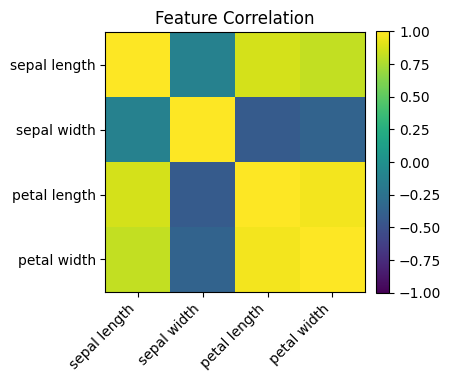

In [109]:
features = ["sepal length", "sepal width", "petal length", "petal width"]
#Basic statistics
display(df_iris[features].describe())
#Correlation matrix
corr = df_iris[features].corr()

#Heatmap for correlation
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4.5,4))
im = ax.imshow(corr, vmin=-1, vmax=1)
ax.set_xticks(range(len(features))); ax.set_yticks(range(len(features)))
ax.set_xticklabels(features, rotation=45, ha='right'); ax.set_yticklabels(features)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_title("Feature Correlation"); plt.tight_layout(); plt.show()


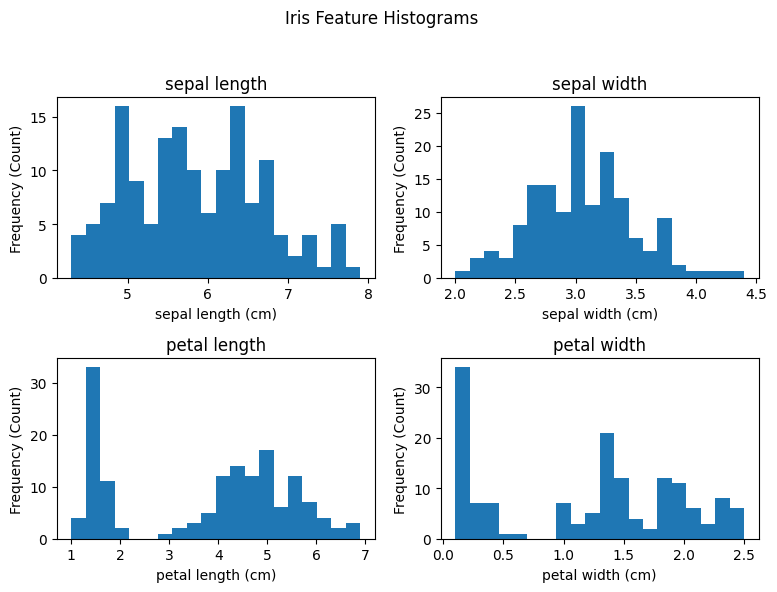

In [110]:
#Histograms
axes = df_iris[features].hist(bins=20,figsize=(8,6))
plt.suptitle("Iris Feature Histograms"); plt.tight_layout();
for ax, feature in zip(axes.flatten(), features):
    ax.set_xlabel(f"{feature} (cm)", fontsize=10)
    ax.set_ylabel("Frequency (Count)", fontsize=10)
    ax.grid(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


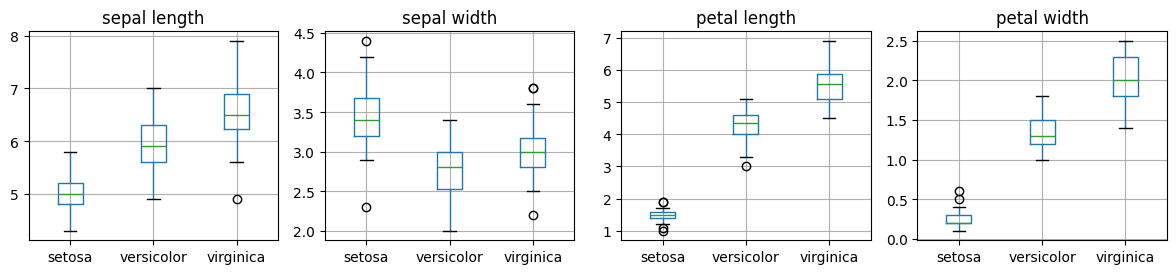

In [111]:
#Boxplots by Species
fig, axs = plt.subplots(1, 4, figsize=(12,3), sharey=False)
for ax, col in zip(axs, features):
    df_iris.boxplot(column=col, by="species", ax=ax)
    ax.set_title(col); ax.set_xlabel(""); ax.set_ylabel("")
plt.suptitle(""); plt.tight_layout(); plt.show()

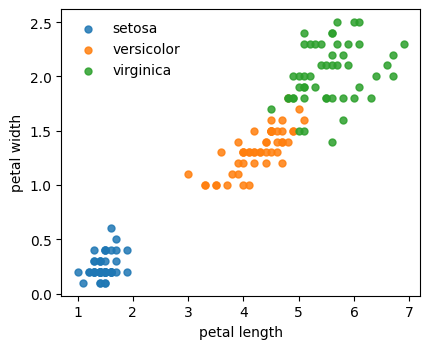

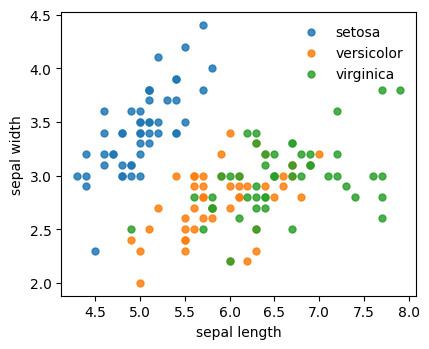

In [112]:
#Scatter Plots
colors = {"setosa":"tab:blue", "versicolor":"tab:orange", "virginica":"tab:green"}
def cls_scatter(xcol, ycol):
    plt.figure(figsize=(4.4,3.6))
    for sp, sub in df_iris.groupby("species"):
        plt.scatter(sub[xcol],sub[ycol], s=25, alpha=0.85, label=sp, c=colors[sp])
    plt.xlabel(xcol); plt.ylabel(ycol); plt.legend(frameon=False); plt.tight_layout(); plt.show()
cls_scatter("petal length", "petal width")   # most separation
cls_scatter("sepal length",  "sepal width")  # weaker separation

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

x = df_iris[features].to_numpy() # feature matrix as numpy array
y = df_iris["target"].to_numpy() # class labels as integers

#Calculate mew and sigma from training data only
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler().fit(X_train)

#Standardization with Training mew and simgma
X_train_s = scaler.transform(X_train) #mean = 0, std = 1
X_test_s  = scaler.transform(X_test)

print("μ≈0:", X_train_s.mean(axis=0))
print("σ≈1:", X_train_s.std(axis=0, ddof=0))


μ≈0: [ 2.38327876e-15 -1.12145742e-15 -1.37456184e-16 -6.97854473e-17]
σ≈1: [1. 1. 1. 1.]


## California Housing Market - Regression Data Analysis
This section focuses on analyzing the housing dataset.

### Section Order Overview
1. Load the data
2. Clean the data
3. Plots:
   - Raw scatter plot, then cleaned scatter plot
   - Raw histogram, then cleaned histogram
   - All other plots (raw data only)

In [ ]:
# Fetch and load the housing data
import os
import tarfile
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

# SSL Fix
import ssl
import certifi
import urllib.request

ssl_context = ssl.create_default_context(cafile=certifi.where())
urllib.request.install_opener(urllib.request.build_opener(urllib.request.HTTPSHandler(context=ssl_context)))

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)

fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

✅ SSL configured successfully!


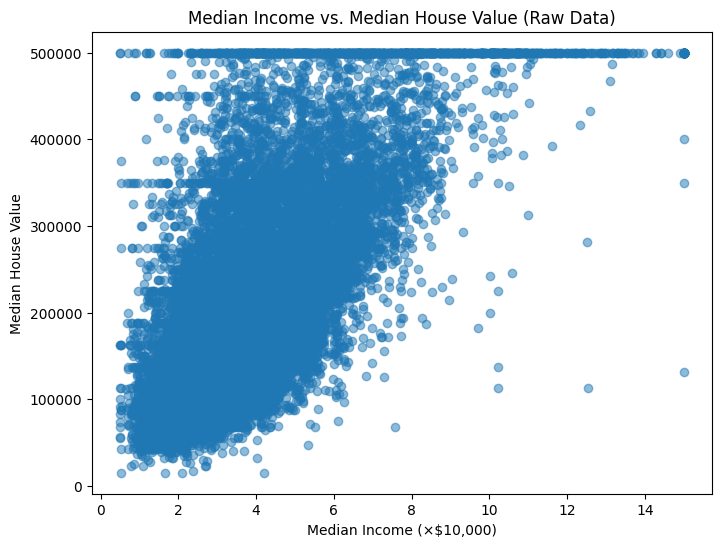

In [115]:
# 1. Scatter plot of raw data (uncleaned)
plt.figure(figsize=(8, 6))
plt.scatter(housing["median_income"], housing["median_house_value"], alpha=0.5)
plt.title("Median Income vs. Median House Value (Raw Data)")
plt.xlabel("Median Income (×$10,000)")
plt.ylabel("Median House Value")
plt.show()

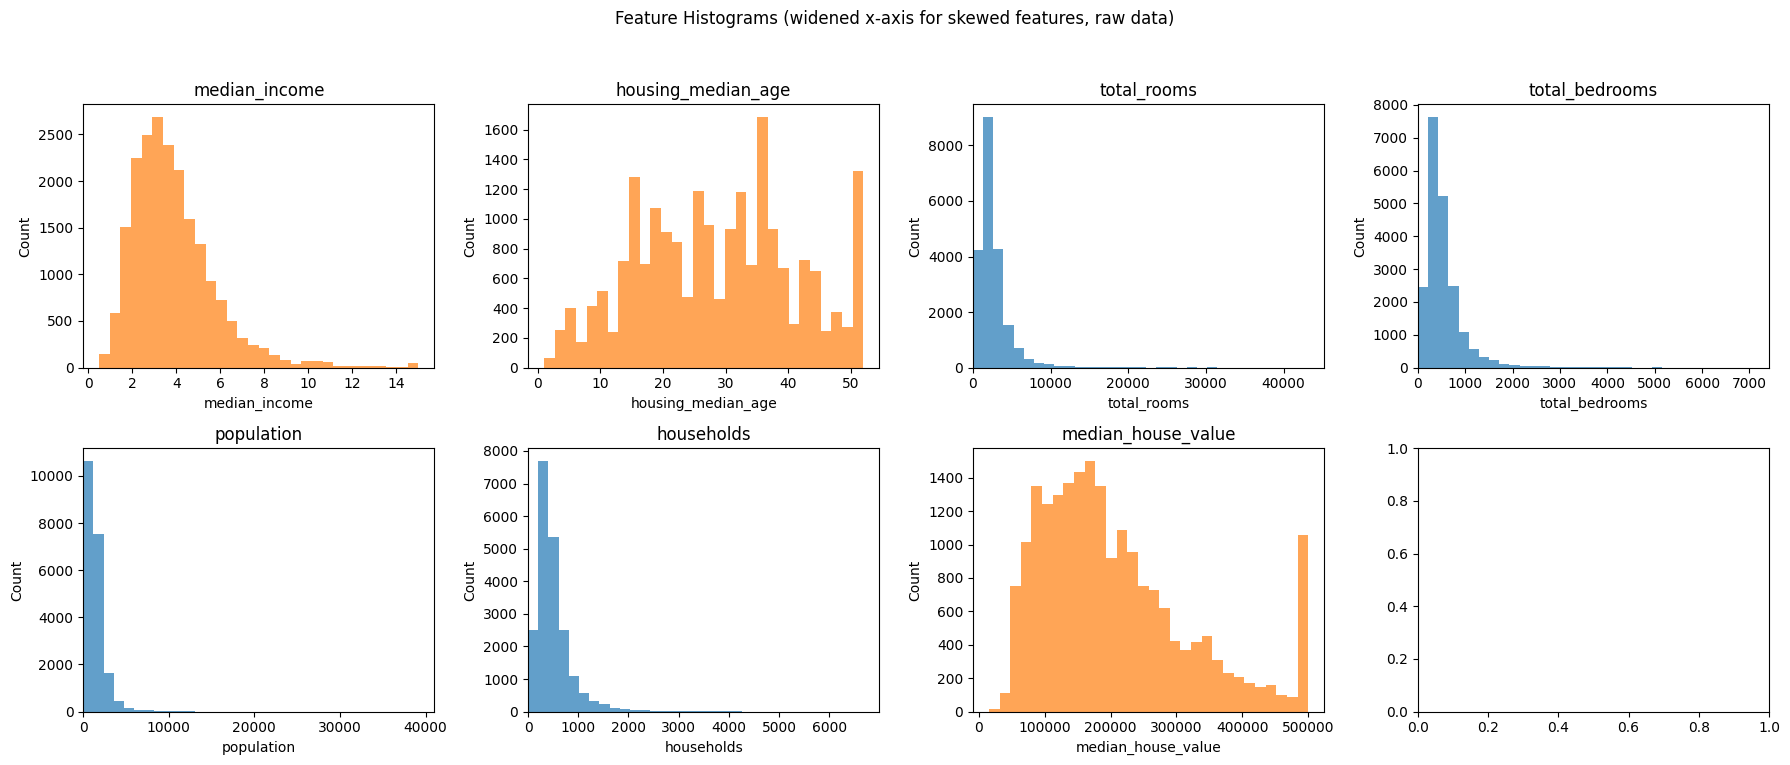

In [116]:
# Histograms for selected features with axis labels and widened x-axis for skewed features (raw data)
import numpy as np
hist_features = ["median_income", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_house_value"]
skewed = ["total_rooms", "total_bedrooms", "population", "households"]
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
for i, feature in enumerate(hist_features):
    ax = axes[i // 4, i % 4]
    data = housing[feature]
    ax.hist(data, bins=30, color='tab:blue' if feature in skewed else 'tab:orange', alpha=0.7)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_title(feature)
    if feature in skewed:
        max_val = data.max()
        ax.set_xlim([0, max_val * 1.15])
fig.suptitle('Feature Histograms (widened x-axis for skewed features, raw data)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [117]:
# Remove rows where median_house_value is capped at $500,000
housing_clean = housing[housing["median_house_value"] < 500000].copy()
print(f"Rows before removal: {housing.shape[0]}")
print(f"Rows after removal: {housing_clean.shape[0]}")

# Further cleaning: keep rows within 3 standard deviations for selected features
features_to_filter = ["median_income", "total_rooms", "total_bedrooms", "population", "households"]
for feature in features_to_filter:
    mean = housing_clean[feature].mean()
    std = housing_clean[feature].std()
    lower = mean - 3 * std
    upper = mean + 3 * std
    before = housing_clean.shape[0]
    housing_clean = housing_clean[(housing_clean[feature] >= lower) & (housing_clean[feature] <= upper)]
    after = housing_clean.shape[0]
    print(f"{feature}: kept rows within 3 std ({before} → {after})")

Rows before removal: 20640
Rows after removal: 19648
median_income: kept rows within 3 std (19648 → 19492)
total_rooms: kept rows within 3 std (19492 → 19140)
total_bedrooms: kept rows within 3 std (19140 → 18605)
population: kept rows within 3 std (18605 → 18347)
households: kept rows within 3 std (18347 → 18143)


In [118]:
# Create raw_zeros_removed: replace zero values in feature columns with column mean
raw_features = ["median_income", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households"]
raw_zeros_removed = housing.copy()
for col in raw_features:
    mean_val = raw_zeros_removed[col].replace(0, np.nan).mean()
    raw_zeros_removed[col] = raw_zeros_removed[col].replace(0, mean_val)
print("Zero values replaced by column mean in raw_zeros_removed.")

Zero values replaced by column mean in raw_zeros_removed.


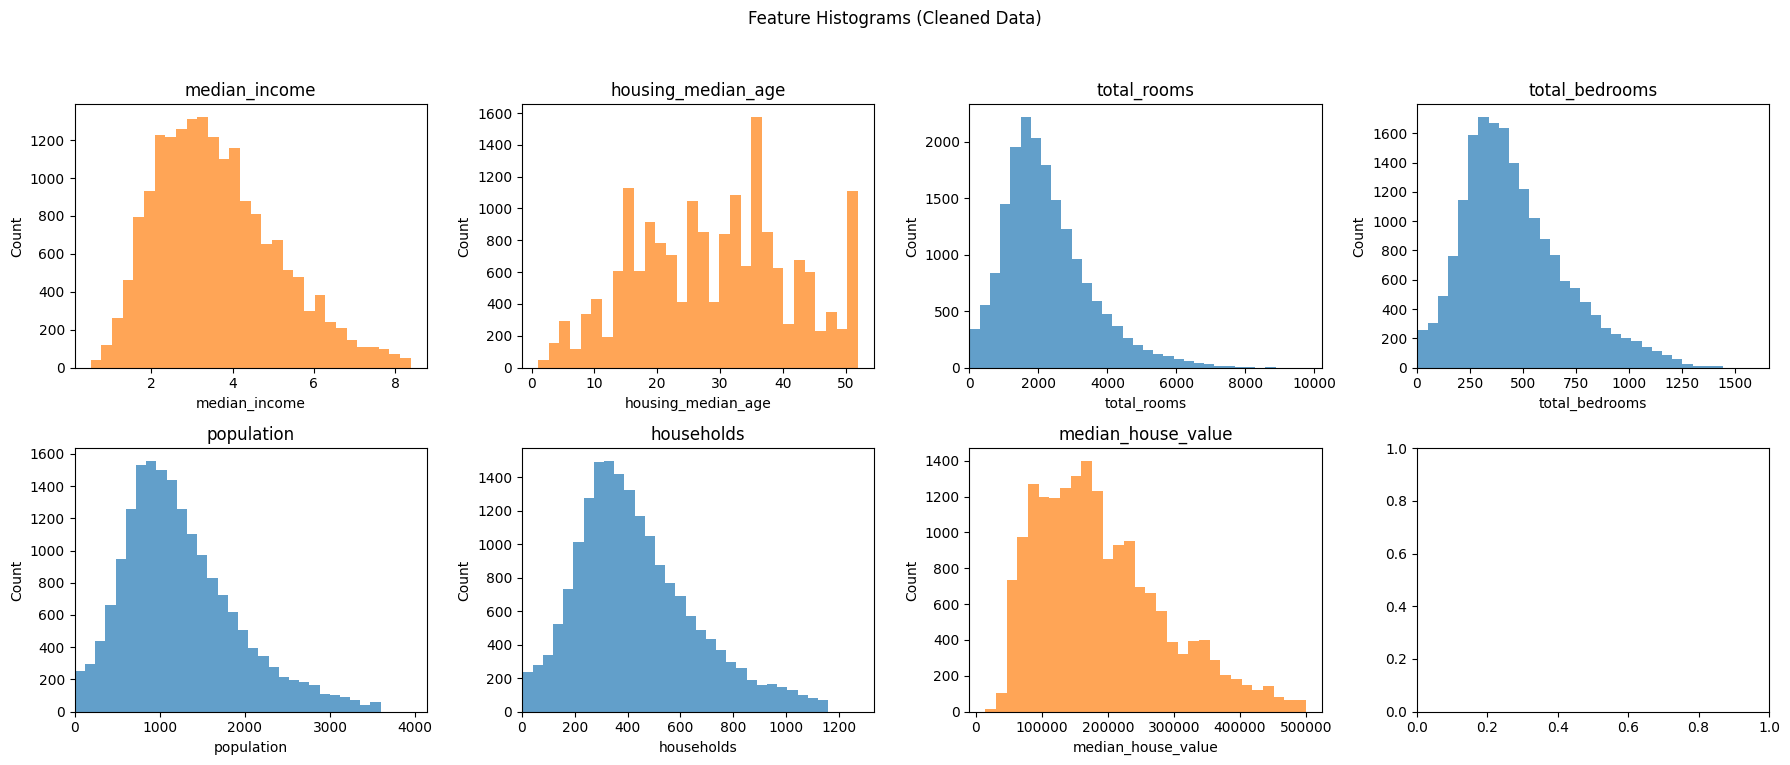

In [119]:
# Histograms for selected features (cleaned data)
hist_features = ["median_income", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_house_value"]
skewed = ["total_rooms", "total_bedrooms", "population", "households"]
import numpy as np
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
for i, feature in enumerate(hist_features):
    ax = axes[i // 4, i % 4]
    data = housing_clean[feature]
    ax.hist(data, bins=30, color='tab:blue' if feature in skewed else 'tab:orange', alpha=0.7)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_title(feature)
    if feature in skewed:
        max_val = data.max()
        ax.set_xlim([0, max_val * 1.15])
fig.suptitle('Feature Histograms (Cleaned Data)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

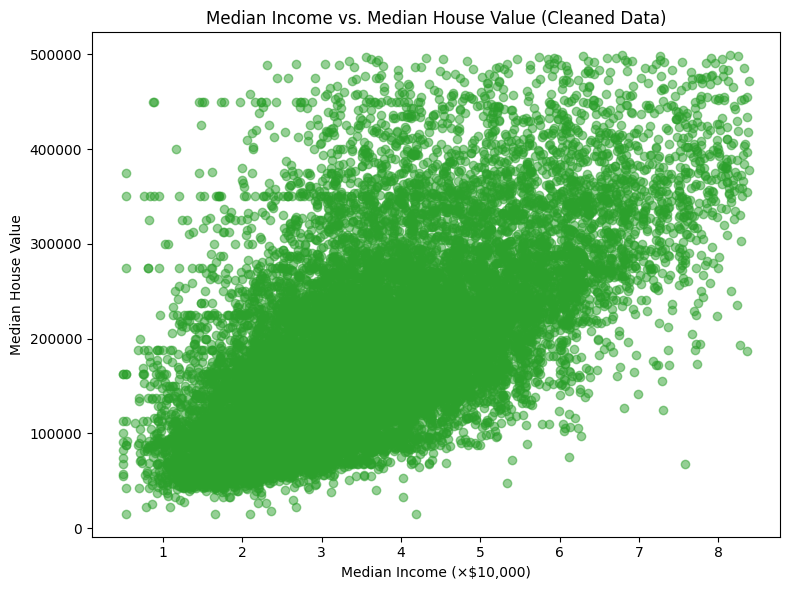

In [120]:
# Scatter plot of median income vs. median house value (cleaned data)
plt.figure(figsize=(8, 6))
plt.scatter(housing_clean["median_income"], housing_clean["median_house_value"], alpha=0.5, color='tab:green')
plt.title("Median Income vs. Median House Value (Cleaned Data)")
plt.xlabel("Median Income (×$10,000)")
plt.ylabel("Median House Value")
plt.tight_layout()
plt.show()

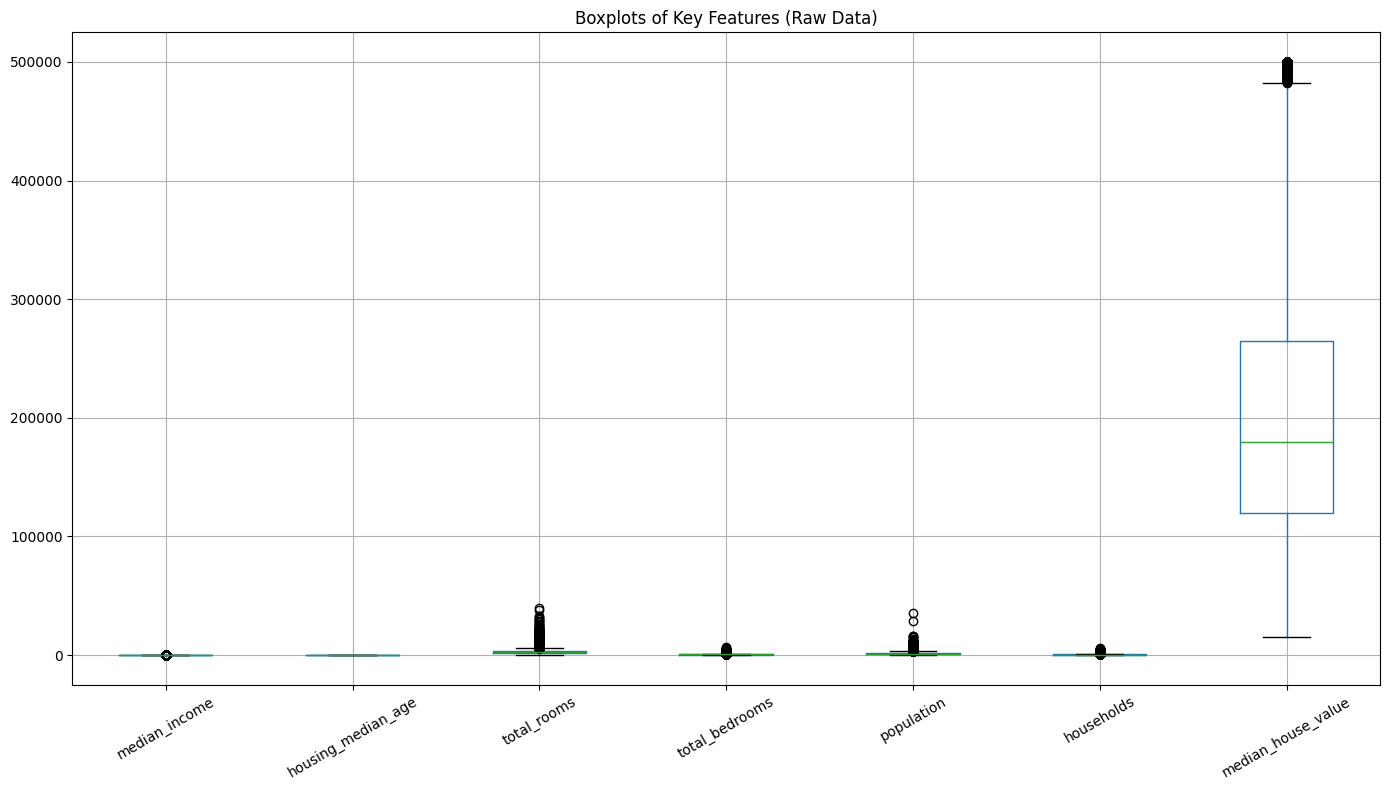

In [121]:
# Boxplots for selected features (raw data)
box_features = ["median_income", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_house_value"]
plt.figure(figsize=(14,8))
housing[box_features].boxplot()
plt.title("Boxplots of Key Features (Raw Data)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

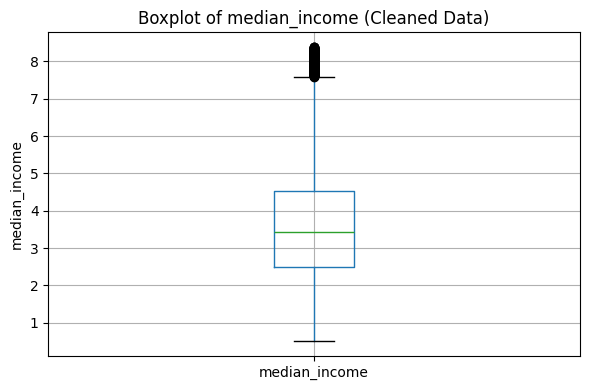

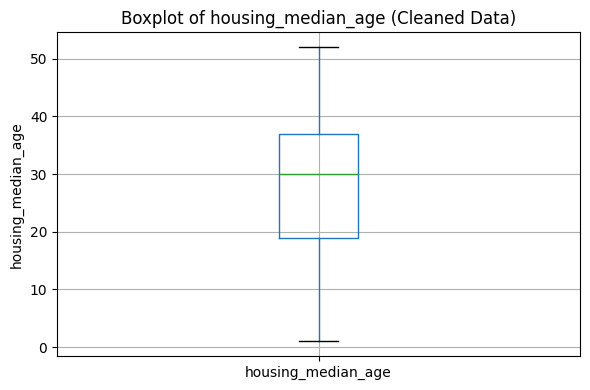

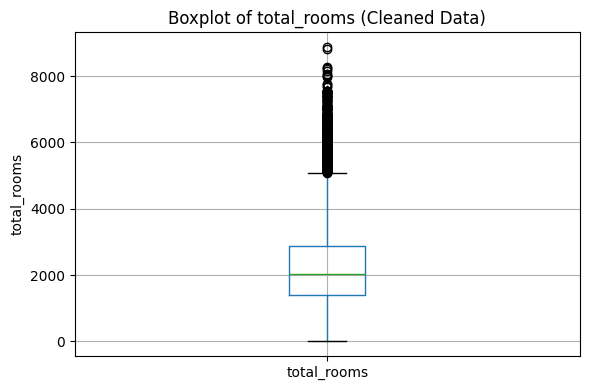

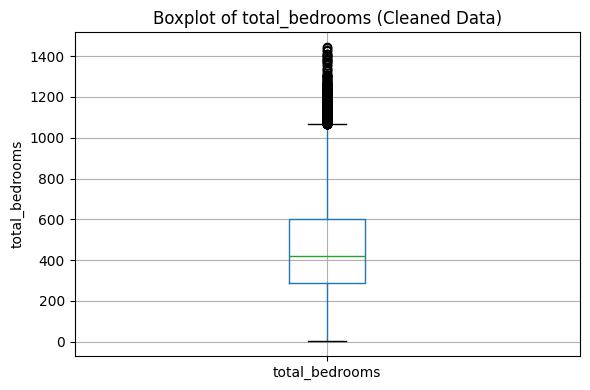

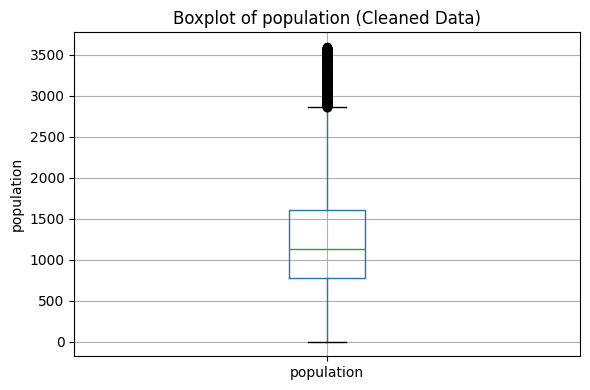

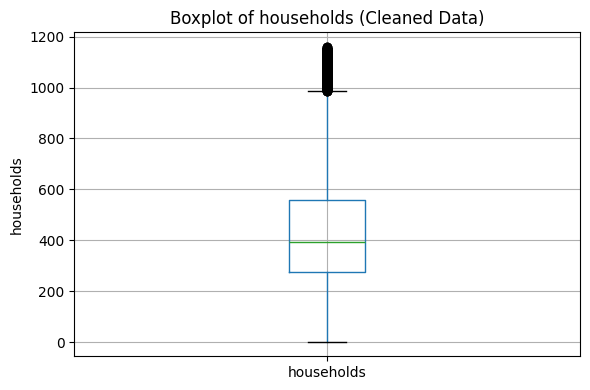

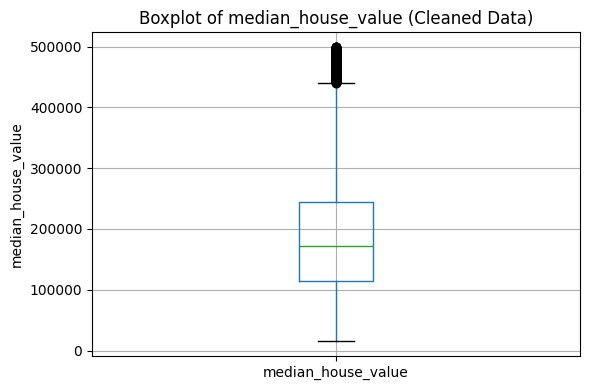

In [122]:
# Individual boxplots for each feature (cleaned data)
cleaned_features = ["median_income", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_house_value"]
for feature in cleaned_features:
    plt.figure(figsize=(6, 4))
    housing_clean.boxplot(column=feature)
    plt.title(f"Boxplot of {feature} (Cleaned Data)")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

### Further Outlier Removal Using IQR (Boxplot-Based Cleaning)
To further clean the data, we remove outliers beyond 1.5 × IQR from the first and third quartiles for each main feature. This step targets outliers visible in the boxplots and helps the model focus on the typical case.

In [123]:
# Remove outliers using IQR for each main feature (boxplot-based cleaning)
iqr_features = ["median_income", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_house_value"]
housing_box_clean = housing_clean.copy()
for feature in iqr_features:
    Q1 = housing_box_clean[feature].quantile(0.25)
    Q3 = housing_box_clean[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = housing_box_clean.shape[0]
    housing_box_clean = housing_box_clean[(housing_box_clean[feature] >= lower) & (housing_box_clean[feature] <= upper)]
    after = housing_box_clean.shape[0]
    print(f"{feature}: kept rows within 1.5 × IQR ({before} → {after})")

median_income: kept rows within 1.5 × IQR (18143 → 17924)
housing_median_age: kept rows within 1.5 × IQR (17924 → 17924)
total_rooms: kept rows within 1.5 × IQR (17924 → 17349)
total_bedrooms: kept rows within 1.5 × IQR (17349 → 17042)
population: kept rows within 1.5 × IQR (17042 → 16686)
households: kept rows within 1.5 × IQR (16686 → 16596)
median_house_value: kept rows within 1.5 × IQR (16596 → 16293)


### Boxplots for Key Features (Final Cleaned Data)
Below is a box and whisker plot for each main feature using the final cleaned data (`housing_box_clean`). This shows the distribution after all outlier removal steps.

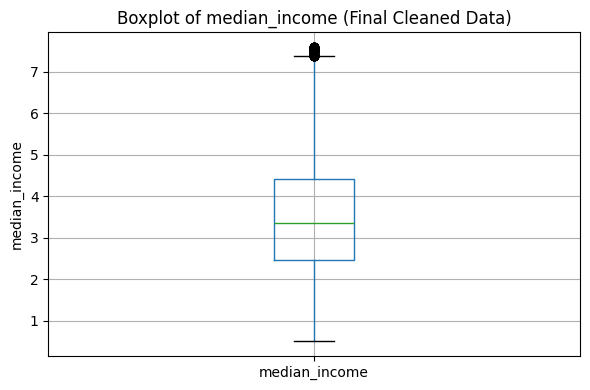

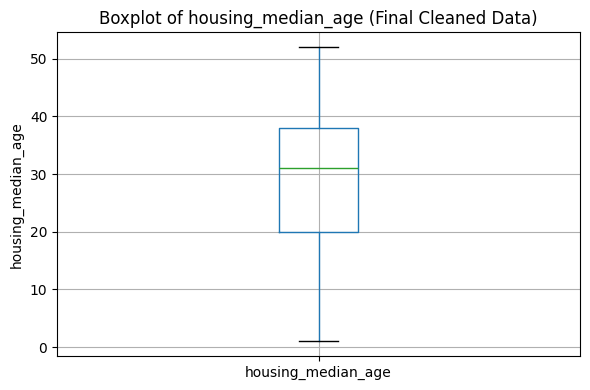

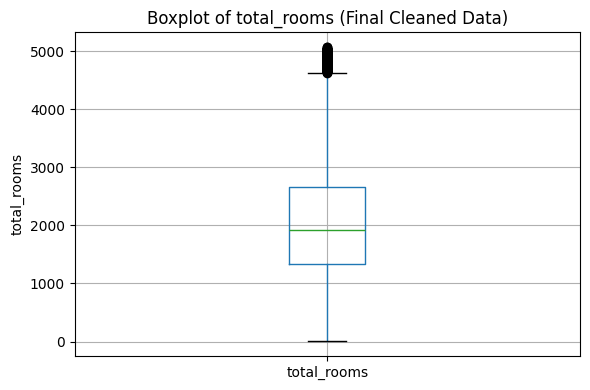

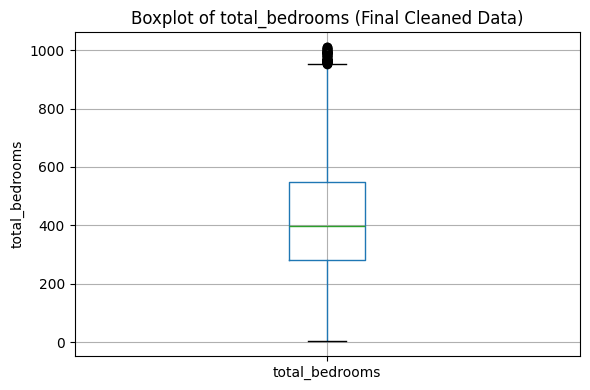

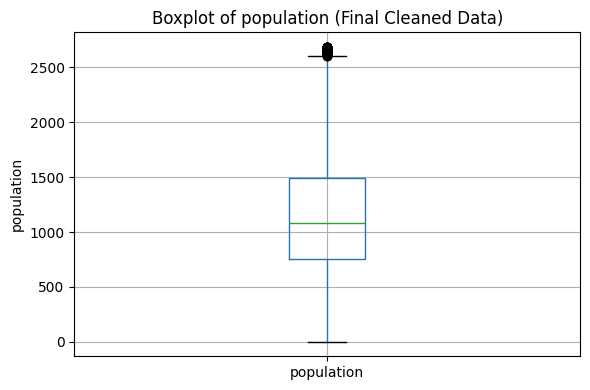

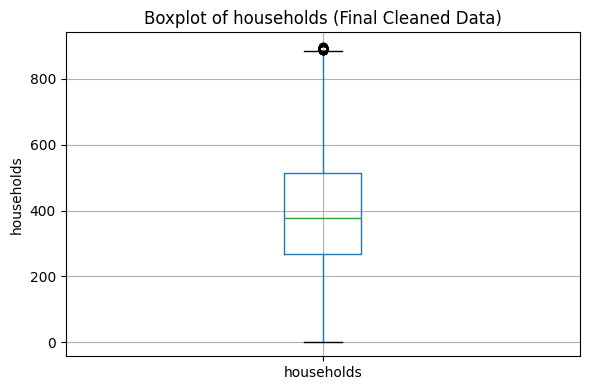

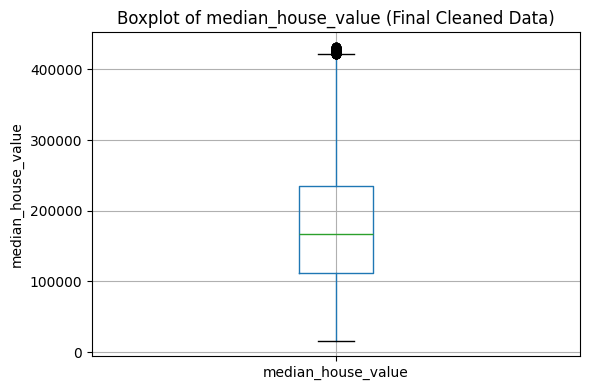

In [124]:
# Individual boxplots for each feature (final cleaned data)
final_features = ["median_income", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_house_value"]
for feature in final_features:
    plt.figure(figsize=(6, 4))
    housing_box_clean.boxplot(column=feature)
    plt.title(f"Boxplot of {feature} (Final Cleaned Data)")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

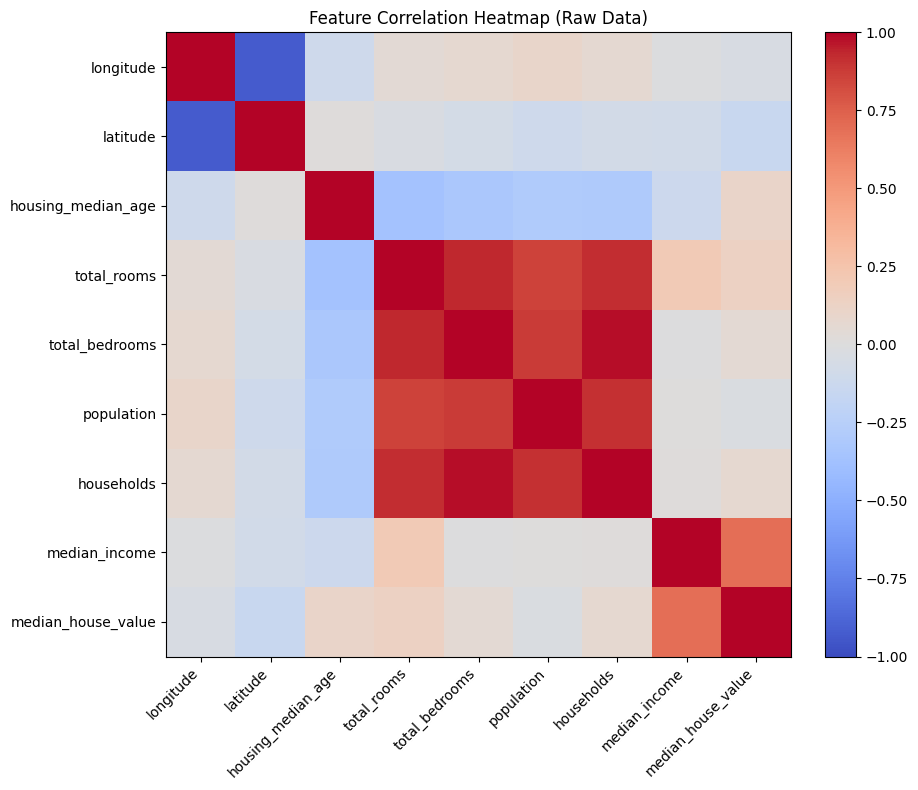

In [125]:
# Correlation heatmap for numeric features (raw data)
corr = housing.corr(numeric_only=True)
plt.figure(figsize=(10,8))
plt.imshow(corr, vmin=-1, vmax=1, cmap='coolwarm')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Feature Correlation Heatmap (Raw Data)")
plt.tight_layout()
plt.show()

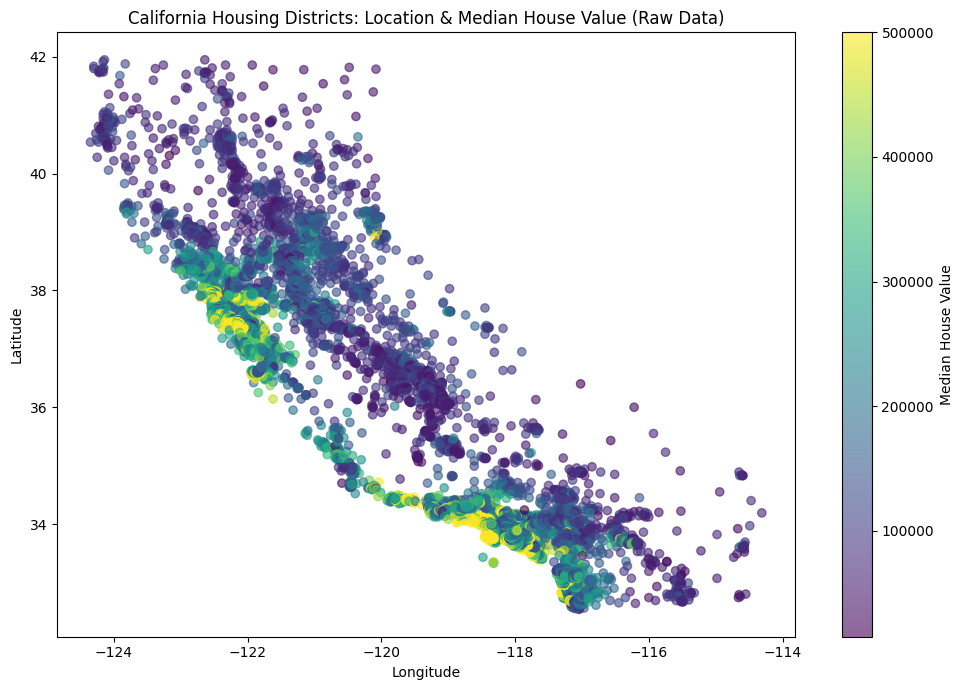

In [126]:
# Geographical scatter plot: longitude vs latitude, colored by median house value (raw data)
plt.figure(figsize=(10,7))
plt.scatter(housing["longitude"], housing["latitude"], c=housing["median_house_value"], cmap="viridis", alpha=0.6)
plt.colorbar(label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Districts: Location & Median House Value (Raw Data)")
plt.tight_layout()
plt.show()

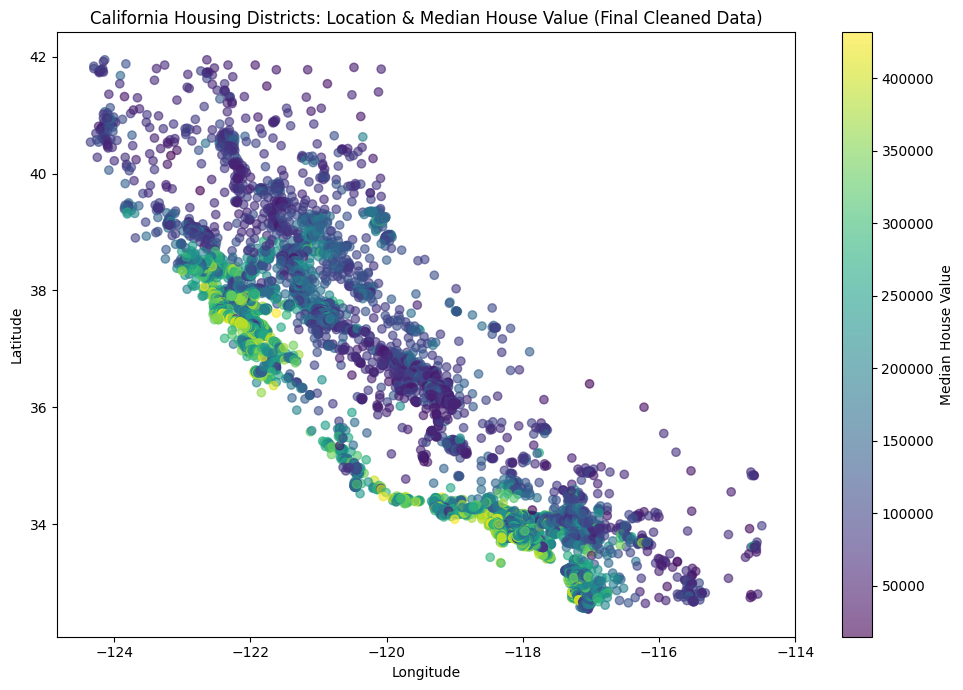

In [127]:
# Geographical scatter plot: longitude vs latitude, colored by median house value (final cleaned data)
plt.figure(figsize=(10,7))
plt.scatter(housing_box_clean["longitude"], housing_box_clean["latitude"], c=housing_box_clean["median_house_value"], cmap="viridis", alpha=0.6)
plt.colorbar(label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Districts: Location & Median House Value (Final Cleaned Data)")
plt.tight_layout()
plt.show()

# Ridge Regression of California Data

In [128]:
# Ridge Regression implemented from scratch using numpy
import numpy as np

class RidgeRegression():
    def __init__(self, learning_rate, iterations, penalty):
        # initialize parameters
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.penalty = penalty
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        # training loop
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            # prediction
            y_pred = np.dot(X, self.weights) + self.bias
            # gradients
            dw = (1/n_samples) * (np.dot(X.T, (y_pred - Y)) + self.penalty * self.weights)
            db = (1/n_samples) * np.sum(y_pred - Y)
            # update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def update_weights(self):
        # weight update rule (already included in fit)
        pass  # The update is performed inside the fit method

    def predict(self, X):
        # prediction rule
        return np.dot(X, self.weights) + self.bias


In [129]:
# Apply Ridge Regression to California Housing data (final cleaned)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
features = ["median_income", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households"]
target = "median_house_value"

X = housing_box_clean[features].values
Y = housing_box_clean[target].values

# Train/test split (70/30, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Standardize features (fit on train, transform both)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try several penalty values to analyze effect
penalties = [0, 10, 100]
results = []
for penalty in penalties:
    model = RidgeRegression(learning_rate=0.01, iterations=1000, penalty=penalty)
    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)
    mse = np.mean((Y_test - Y_pred) ** 2)
    results.append({"penalty": penalty, "mse": mse, "weights": model.weights.copy()})
    print(f"Penalty: {penalty}, MSE: {mse:.2f}")
    print(f"Coefficients: {model.weights}")

# Display summary of results
import pandas as pd
summary = pd.DataFrame(results)
display(summary)

Penalty: 0, MSE: 3771261652.85
Coefficients: [ 63044.75658215  18914.44092301 -18419.52696321  22263.77370047
 -23456.70070644  25269.17646587]
Penalty: 10, MSE: 3772258469.17
Coefficients: [ 62957.58108318  18892.2699003  -18302.2984951   22177.08658144
 -23386.73422865  25179.23997397]
Penalty: 100, MSE: 3781544052.30
Coefficients: [ 62186.54026052  18694.32592286 -17277.66779316  21417.70728813
 -22771.72695529  24390.97249915]


,penalty,mse,weights
0,0,3.7713e+09,"[63044.75658214999, 18914.440923008777, -18419..."
1,10,3.7723e+09,"[62957.581083182726, 18892.2699002979, -18302...."
2,100,3.7815e+09,"[62186.54026052235, 18694.325922857373, -17277..."


Penalty: 0, MSE: 3771261652.85, RMSE: 61410.60, R^2: 0.5078
Coefficients: [ 63044.75658215  18914.44092301 -18419.52696321  22263.77370047
 -23456.70070644  25269.17646587]
Penalty: 1, MSE: 3771361004.40, RMSE: 61411.41, R^2: 0.5078
Coefficients: [ 63036.02525539  18912.22222173 -18407.77304065  22255.08375325
 -23449.68908362  25260.16122063]
Penalty: 5, MSE: 3771759145.96, RMSE: 61414.65, R^2: 0.5077
Coefficients: [ 63001.13059074  18903.35097039 -18360.8264818   22220.37120307
 -23421.67590259  25224.14828051]
Penalty: 10, MSE: 3772258469.17, RMSE: 61418.71, R^2: 0.5076
Coefficients: [ 62957.58108318  18892.2699003  -18302.2984951   22177.08658144
 -23386.73422865  25179.23997397]
Penalty: 25, MSE: 3773767282.90, RMSE: 61431.00, R^2: 0.5075
Coefficients: [ 62827.38943601  18859.07995438 -18127.74396314  22047.93630379
 -23282.40556822  25045.23062116]
Penalty: 50, MSE: 3776317313.97, RMSE: 61451.75, R^2: 0.5071
Coefficients: [ 62611.91420631  18803.94073657 -17840.21821388  21835.00

,penalty,mse,rmse,r2,weights
0,0,3.7713e+09,61410.5989,0.5078,"[63044.75658214999, 18914.440923008777, -18419..."
1,1,3.7714e+09,61411.4078,0.5078,"[63036.025255391054, 18912.222221734635, -1840..."
2,5,3.7718e+09,61414.6493,0.5077,"[63001.13059074235, 18903.35097038544, -18360...."
3,10,3.7723e+09,61418.7143,0.5076,"[62957.581083182726, 18892.2699002979, -18302...."
4,25,3.7738e+09,61430.9961,0.5075,"[62827.3894360068, 18859.079954384913, -18127...."
5,50,3.7763e+09,61451.7479,0.5071,"[62611.91420631481, 18803.940736568762, -17840..."
6,100,3.7815e+09,61494.2603,0.5064,"[62186.54026052235, 18694.325922857373, -17277..."
7,250,3.7981e+09,61628.9660,0.5043,"[60953.313123438835, 18370.758385814617, -1568..."
8,500,3.8282e+09,61872.2115,0.5004,"[59030.28212946298, 17848.824571276844, -13320..."
9,1000,3.8938e+09,62400.4717,0.4918,"[55611.491477148724, 16867.814809145642, -9490..."


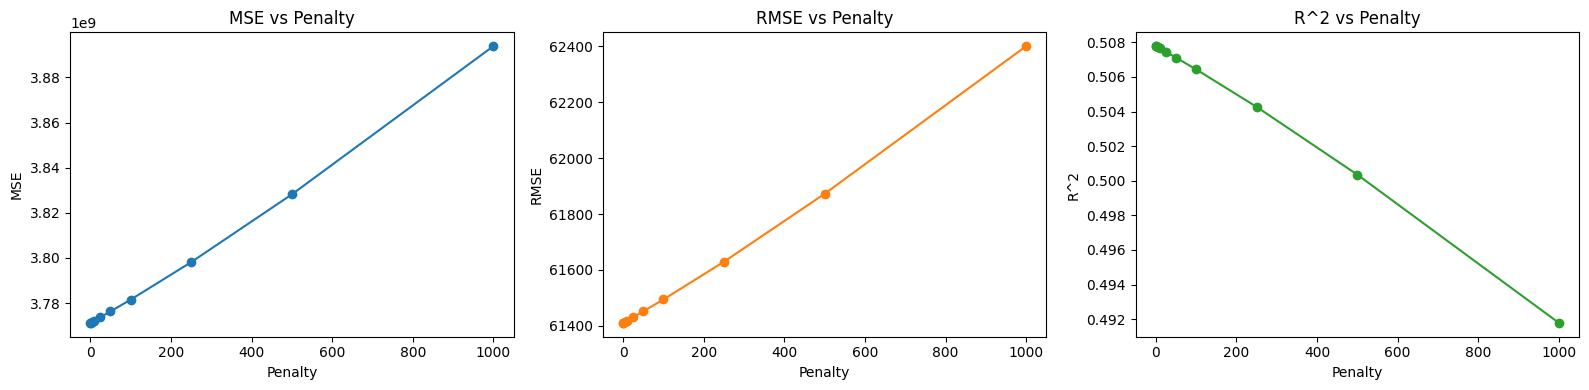

In [130]:
# Extended Ridge Regression analysis: more penalties, RMSE, R^2
import matplotlib.pyplot as plt

penalties = [0, 1, 5, 10, 25, 50, 100, 250, 500, 1000]
results = []
for penalty in penalties:
    model = RidgeRegression(learning_rate=0.01, iterations=1000, penalty=penalty)
    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)
    mse = np.mean((Y_test - Y_pred) ** 2)
    rmse = np.sqrt(mse)
    r2 = 1 - mse / np.var(Y_test)
    results.append({"penalty": penalty, "mse": mse, "rmse": rmse, "r2": r2, "weights": model.weights.copy()})
    print(f"Penalty: {penalty}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R^2: {r2:.4f}")
    print(f"Coefficients: {model.weights}")

# Display summary of results
import pandas as pd
summary = pd.DataFrame(results)
display(summary)

# Plot MSE, RMSE, R^2 vs penalty
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].plot(summary["penalty"], summary["mse"], marker='o')
axs[0].set_title("MSE vs Penalty")
axs[0].set_xlabel("Penalty")
axs[0].set_ylabel("MSE")
axs[1].plot(summary["penalty"], summary["rmse"], marker='o', color='tab:orange')
axs[1].set_title("RMSE vs Penalty")
axs[1].set_xlabel("Penalty")
axs[1].set_ylabel("RMSE")
axs[2].plot(summary["penalty"], summary["r2"], marker='o', color='tab:green')
axs[2].set_title("R^2 vs Penalty")
axs[2].set_xlabel("Penalty")
axs[2].set_ylabel("R^2")
plt.tight_layout()
plt.show()

In [131]:
# Compare RMSE to standard deviation of target (Y_test)
std_y_test = np.std(Y_test)
print(f"Standard deviation of Y_test: {std_y_test:.2f}")
print("\nRMSE / std(Y_test) for each penalty:")
for i, penalty in enumerate(summary["penalty"]):
    rmse = summary.loc[i, "rmse"]
    ratio = rmse / std_y_test
    print(f"Penalty: {penalty:>5}, RMSE: {rmse:.2f}, Ratio: {ratio:.3f}")

Standard deviation of Y_test: 87531.17

RMSE / std(Y_test) for each penalty:
Penalty:     0, RMSE: 61410.60, Ratio: 0.702
Penalty:     1, RMSE: 61411.41, Ratio: 0.702
Penalty:     5, RMSE: 61414.65, Ratio: 0.702
Penalty:    10, RMSE: 61418.71, Ratio: 0.702
Penalty:    25, RMSE: 61431.00, Ratio: 0.702
Penalty:    50, RMSE: 61451.75, Ratio: 0.702
Penalty:   100, RMSE: 61494.26, Ratio: 0.703
Penalty:   250, RMSE: 61628.97, Ratio: 0.704
Penalty:   500, RMSE: 61872.21, Ratio: 0.707
Penalty:  1000, RMSE: 62400.47, Ratio: 0.713


In [132]:
# Compare Ridge Regression performance on raw_zeros_removed, housing_clean, and housing_box_clean data
def ridge_regression_results(data, features, target, penalties):
    X = data[features].values
    Y = data[target].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    std_y_test = np.std(Y_test)
    print(f"Standard deviation of Y_test: {std_y_test:.2f}")
    print("Penalty | RMSE | RMSE/std(Y_test)")
    for penalty in penalties:
        model = RidgeRegression(learning_rate=0.01, iterations=1000, penalty=penalty)
        model.fit(X_train_scaled, Y_train)
        Y_pred = model.predict(X_test_scaled)
        mse = np.mean((Y_test - Y_pred) ** 2)
        rmse = np.sqrt(mse)
        ratio = rmse / std_y_test
        print(f"{penalty:>6} | {rmse:>7.2f} | {ratio:>10.3f}")
    print()

features = ["median_income", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households"]
target = "median_house_value"
penalties = [0, 1, 5, 10, 25, 50, 100, 250, 500, 1000]

print("--- Raw Data ---")
ridge_regression_results(raw_zeros_removed, features, target, penalties)

print("--- housing_clean Data ---")
ridge_regression_results(housing_clean, features, target, penalties)

print("--- housing_box_clean Data (already shown above) ---")
ridge_regression_results(housing_box_clean, features, target, penalties)

--- Raw Data ---
Standard deviation of Y_test: 114566.14
Penalty | RMSE | RMSE/std(Y_test)
     0 |     nan |        nan
     1 |     nan |        nan
     5 |     nan |        nan
    10 |     nan |        nan
    25 |     nan |        nan
    50 |     nan |        nan
   100 |     nan |        nan
   250 |     nan |        nan
   500 |     nan |        nan
  1000 |     nan |        nan

--- housing_clean Data ---
Standard deviation of Y_test: 96880.07
Penalty | RMSE | RMSE/std(Y_test)
     0 | 67242.32 |      0.694
     1 | 67243.04 |      0.694
     5 | 67245.95 |      0.694
    10 | 67249.60 |      0.694
    25 | 67260.64 |      0.694
    50 | 67279.32 |      0.694
   100 | 67317.71 |      0.695
   250 | 67440.42 |      0.696
   500 | 67665.54 |      0.698
  1000 | 68167.16 |      0.704

--- housing_box_clean Data (already shown above) ---
Standard deviation of Y_test: 87531.17
Penalty | RMSE | RMSE/std(Y_test)
     0 | 61410.60 |      0.702
     1 | 61411.41 |      0.702
     5 | 

In [133]:
# LASSO Regression implemented from scratch using numpy
import numpy as np
class LassoRegression():
    def __init__(self, learning_rate, iterations, penalty):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.penalty = penalty
        self.weights = None
        self.bias = None
    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * (np.dot(X.T, (y_pred - Y)))
            # L1 penalty gradient (subgradient)
            dw += self.penalty * np.sign(self.weights)
            db = (1/n_samples) * np.sum(y_pred - Y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Apply LASSO Regression to housing_box_clean data
features = ["median_income", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households"]
target = "median_house_value"
X = housing_box_clean[features].values
Y = housing_box_clean[target].values
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

penalties = [0, 1, 5, 10, 25, 50, 100, 250, 500, 1000]
results = []
for penalty in penalties:
    model = LassoRegression(learning_rate=0.01, iterations=1000, penalty=penalty)
    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)
    mse = np.mean((Y_test - Y_pred) ** 2)
    rmse = np.sqrt(mse)
    r2 = 1 - mse / np.var(Y_test)
    results.append({"penalty": penalty, "mse": mse, "rmse": rmse, "r2": r2, "weights": model.weights.copy()})
    print(f"Penalty: {penalty}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R^2: {r2:.4f}")
    print(f"Coefficients: {model.weights}")

import pandas as pd
summary_lasso = pd.DataFrame(results)
display(summary_lasso)

# Compare RMSE to standard deviation of target (Y_test) for LASSO
std_y_test = np.std(Y_test)
print(f"Standard deviation of Y_test: {std_y_test:.2f}")
print("\nLASSO RMSE / std(Y_test) for each penalty:")
for i, penalty in enumerate(summary_lasso["penalty"]):
    rmse = summary_lasso.loc[i, "rmse"]
    ratio = rmse / std_y_test
    print(f"Penalty: {penalty:>5}, RMSE: {rmse:.2f}, Ratio: {ratio:.3f}")

Penalty: 0, MSE: 3771261652.85, RMSE: 61410.60, R^2: 0.5078
Coefficients: [ 63044.75658215  18914.44092301 -18419.52696321  22263.77370047
 -23456.70070644  25269.17646587]
Penalty: 1, MSE: 3771319309.99, RMSE: 61411.07, R^2: 0.5078
Coefficients: [ 63041.99357117  18913.45543893 -18413.28095327  22258.80946433
 -23452.1643712   25263.94786109]
Penalty: 5, MSE: 3771550212.00, RMSE: 61412.95, R^2: 0.5077
Coefficients: [ 63030.94152726  18909.5135026  -18388.29691354  22238.95251978
 -23434.01903024  25243.03344199]
Penalty: 10, MSE: 3771839454.68, RMSE: 61415.30, R^2: 0.5077
Coefficients: [ 63017.12647236  18904.58608218 -18357.06686387  22214.13133909
 -23411.33735404  25216.89041811]
Penalty: 25, MSE: 3772711283.93, RMSE: 61422.40, R^2: 0.5076
Coefficients: [ 62975.68130768  18889.80382094 -18263.37671487  22139.66779703
 -23343.29232545  25138.46134648]
Penalty: 50, MSE: 3774180399.22, RMSE: 61434.36, R^2: 0.5074
Coefficients: [ 62906.48858825  18865.18575112 -18106.84753681  22015.35

,penalty,mse,rmse,r2,weights
0,0,3.7713e+09,61410.5989,0.5078,"[63044.75658214999, 18914.440923008777, -18419..."
1,1,3.7713e+09,61411.0683,0.5078,"[63041.99357117122, 18913.45543892609, -18413...."
2,5,3.7716e+09,61412.9482,0.5077,"[63030.94152725612, 18909.51350259539, -18388...."
3,10,3.7718e+09,61415.3031,0.5077,"[63017.12647236222, 18904.58608218202, -18357...."
4,25,3.7727e+09,61422.4005,0.5076,"[62975.68130768058, 18889.803820941866, -18263..."
5,50,3.7742e+09,61434.3585,0.5074,"[62906.488588254775, 18865.185751119807, -1810..."
6,100,3.7772e+09,61458.7049,0.5070,"[62767.98590749096, 18815.968591590725, -17793..."
7,250,3.7866e+09,61535.4748,0.5058,"[62349.90390923679, 18668.73330472961, -16844...."
8,500,3.8039e+09,61675.5335,0.5035,"[61646.90088024059, 18424.339896301866, -15243..."
9,1000,3.8442e+09,62001.7293,0.4983,"[60216.73844182971, 17939.421733353265, -11963..."


Standard deviation of Y_test: 87531.17

LASSO RMSE / std(Y_test) for each penalty:
Penalty:     0, RMSE: 61410.60, Ratio: 0.702
Penalty:     1, RMSE: 61411.07, Ratio: 0.702
Penalty:     5, RMSE: 61412.95, Ratio: 0.702
Penalty:    10, RMSE: 61415.30, Ratio: 0.702
Penalty:    25, RMSE: 61422.40, Ratio: 0.702
Penalty:    50, RMSE: 61434.36, Ratio: 0.702
Penalty:   100, RMSE: 61458.70, Ratio: 0.702
Penalty:   250, RMSE: 61535.47, Ratio: 0.703
Penalty:   500, RMSE: 61675.53, Ratio: 0.705
Penalty:  1000, RMSE: 62001.73, Ratio: 0.708


## Multiclass SVM Implementation

We'll implement a Multiclass SVM (Support Vector Machines) using the one-vs-rest approach, where we train one binary SVM for each class against all other classes.

In [134]:
class MulticlassSVM():
    """
    Multiclass SVM using one-vs-rest approach
    Following exact assignment requirements with only 3 methods
    """
    
    def __init__(self, learning_rate, lambda_param, n_iters):
        # initialize parameters for gradient descent and regularization
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        
        # prepare storage for one-vs-rest classifiers
        self.classifiers = {}
        self.n_classes = None
        self.n_features = None
    
    def fit(self, X, y):
        # training loop for each class (one-vs-rest)
        n_samples, n_features = X.shape
        self.n_features = n_features
        self.n_classes = len(np.unique(y))
        
        print(f"Training Multiclass SVM: {self.n_classes} classes, {n_features} features")
        print(f"Parameters: lr={self.learning_rate}, lambda={self.lambda_param}, iters={self.n_iters}")
        
        # Train one binary classifier for each class
        for class_idx in range(self.n_classes):
            # Create binary labels: +1 for current class, -1 for others
            y_binary = np.where(y == class_idx, 1, -1)
            
            # Initialize weights and bias for this class
            np.random.seed(42 + class_idx)
            weights = np.random.randn(n_features) * 0.01
            bias = 0.0
            
            # Gradient descent training loop
            for iteration in range(self.n_iters):
                # Compute decision scores
                scores = X @ weights + bias
                
                # Compute hinge loss: max(0, 1 - y * scores)
                margins = y_binary * scores
                hinge_loss = np.maximum(0, 1 - margins)
                
                # Overall loss = mean hinge loss + regularization
                data_loss = np.mean(hinge_loss)
                reg_loss = self.lambda_param * np.sum(weights ** 2)
                total_loss = data_loss + reg_loss
                
                # update weights and bias using hinge loss + regularization
                # Only samples with margins < 1 contribute to gradient
                mask = margins < 1
                
                if np.any(mask):
                    # Gradient w.r.t. weights
                    grad_weights = -np.mean((y_binary[mask] * X[mask].T), axis=1)
                    grad_weights += 2 * self.lambda_param * weights
                    
                    # Gradient w.r.t. bias
                    grad_bias = -np.mean(y_binary[mask])
                    
                    # Update weights and bias
                    weights -= self.learning_rate * grad_weights
                    bias -= self.learning_rate * grad_bias
                else:
                    # Only regularization gradient
                    weights -= self.learning_rate * 2 * self.lambda_param * weights
            
            # Store the trained classifier
            self.classifiers[class_idx] = {
                'weights': weights,
                'bias': bias
            }
    
    def predict(self, X):
        # compute decision scores for each class
        n_samples = X.shape[0]
        decision_scores = np.zeros((n_samples, self.n_classes))
        
        for class_idx, classifier in self.classifiers.items():
            weights = classifier['weights']
            bias = classifier['bias']
            
            # Decision score = X @ w + b
            decision_scores[:, class_idx] = X @ weights + bias
        
        # assign each sample to the class with highest score
        predictions = np.argmax(decision_scores, axis=1)
        
        return predictions

In [135]:
# Train the Multiclass SVM
print("=" * 60)
print("TRAINING MULTICLASS SVM")
print("=" * 60)

# Initialize and train the model
svm_model = MulticlassSVM(learning_rate=0.01, lambda_param=0.01, n_iters=1000)
svm_model.fit(X_train_s, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_s)

# Calculate accuracy
accuracy_svm = np.mean(y_pred_svm == y_test)
print(f"\nSVM Test Accuracy: {accuracy_svm:.4f} ({accuracy_svm*100:.2f}%)")

# Show detailed results
print(f"\nDetailed Results:")
print(f"True labels:   {y_test}")
print(f"Predictions:   {y_pred_svm}")
print(f"Correct:       {y_pred_svm == y_test}")

# Confusion matrix
from sklearn.metrics import classification_report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=iris.target_names))


TRAINING MULTICLASS SVM
Training Multiclass SVM: 3 classes, 4 features
Parameters: lr=0.01, lambda=0.01, iters=1000

SVM Test Accuracy: 0.8000 (80.00%)

Detailed Results:
True labels:   [2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 1 1 0 2 2 1]
Predictions:   [2 1 1 2 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 2 2 1 2 0 1 2 2 0 2 0 0
 0 0 2 1 0 1 2 1]
Correct:       [ True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False  True False  True False  True False  True  True  True
  True  True  True False  True  True False  True  True]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.75      0.60      0.67        15
   virginica       0.67      0.80      0.73        15

    accuracy                           0.80        45
   macro avg       0.81    

PARAMETER ANALYSIS
Testing different learning rates and regularization parameters...
Format: (learning_rate, lambda_param) -> Accuracy
Training Multiclass SVM: 3 classes, 4 features
Parameters: lr=0.001, lambda=0.001, iters=1000
(0.001, 0.001) -> 0.7333
Training Multiclass SVM: 3 classes, 4 features
Parameters: lr=0.001, lambda=0.01, iters=1000
(0.001, 0.01) -> 0.7333
Training Multiclass SVM: 3 classes, 4 features
Parameters: lr=0.001, lambda=0.1, iters=1000
(0.001, 0.1) -> 0.7333
Training Multiclass SVM: 3 classes, 4 features
Parameters: lr=0.01, lambda=0.001, iters=1000
(0.01, 0.001) -> 0.8000
Training Multiclass SVM: 3 classes, 4 features
Parameters: lr=0.01, lambda=0.01, iters=1000
(0.01, 0.01) -> 0.8000
Training Multiclass SVM: 3 classes, 4 features
Parameters: lr=0.01, lambda=0.1, iters=1000
(0.01, 0.1) -> 0.8000
Training Multiclass SVM: 3 classes, 4 features
Parameters: lr=0.1, lambda=0.001, iters=1000
(0.1, 0.001) -> 0.8667
Training Multiclass SVM: 3 classes, 4 features
Paramet

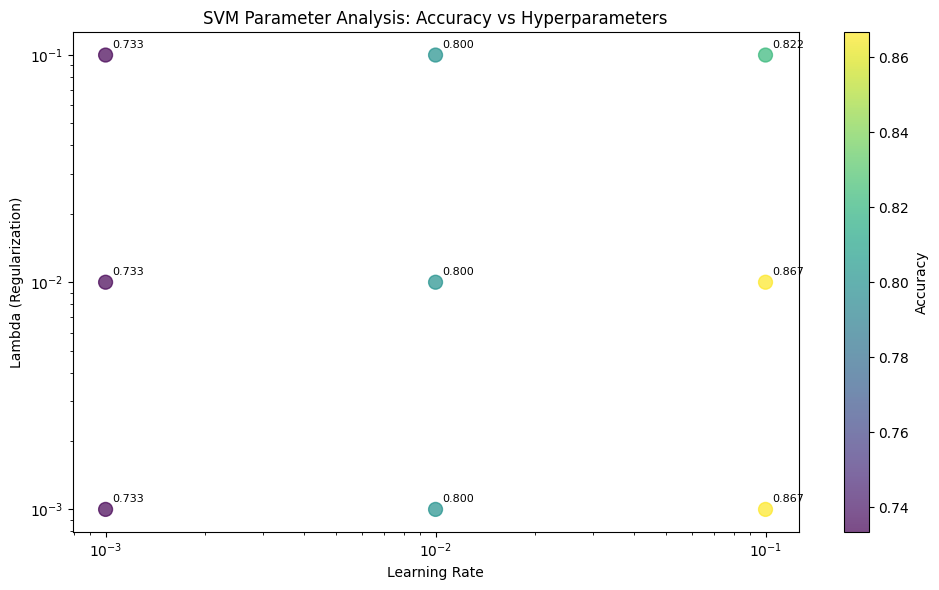

In [136]:
# Parameter Analysis: How choice of parameters affects model performance
print("=" * 60)
print("PARAMETER ANALYSIS")
print("=" * 60)

# Test different learning rates
learning_rates = [0.001, 0.01, 0.1]
lambda_params = [0.001, 0.01, 0.1]

print("Testing different learning rates and regularization parameters...")
print("Format: (learning_rate, lambda_param) -> Accuracy")

best_accuracy = 0
best_params = None
results = []

for lr in learning_rates:
    for lam in lambda_params:
        # Train model with current parameters
        svm_temp = MulticlassSVM(learning_rate=lr, lambda_param=lam, n_iters=1000)
        svm_temp.fit(X_train_s, y_train)
        
        # Evaluate
        y_pred_temp = svm_temp.predict(X_test_s)
        accuracy_temp = np.mean(y_pred_temp == y_test)
        
        results.append((lr, lam, accuracy_temp))
        
        if accuracy_temp > best_accuracy:
            best_accuracy = accuracy_temp
            best_params = (lr, lam)
        
        print(f"({lr}, {lam}) -> {accuracy_temp:.4f}")

print(f"\nBest parameters: learning_rate={best_params[0]}, lambda={best_params[1]}")
print(f"Best accuracy: {best_accuracy:.4f}")

# Plot parameter analysis
fig, ax = plt.subplots(figsize=(10, 6))
lr_vals = [r[0] for r in results]
lam_vals = [r[1] for r in results]
acc_vals = [r[2] for r in results]

# Create scatter plot with color indicating accuracy
scatter = ax.scatter(lr_vals, lam_vals, c=acc_vals, cmap='viridis', s=100, alpha=0.7)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Lambda (Regularization)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('SVM Parameter Analysis: Accuracy vs Hyperparameters')
plt.colorbar(scatter, label='Accuracy')

# Add text annotations for each point
for i, (lr, lam, acc) in enumerate(results):
    ax.annotate(f'{acc:.3f}', (lr, lam), xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()


DECISION BOUNDARY ANALYSIS
Training Multiclass SVM: 3 classes, 4 features
Parameters: lr=0.1, lambda=0.001, iters=3000
Plotting decision boundaries for Sepal features...


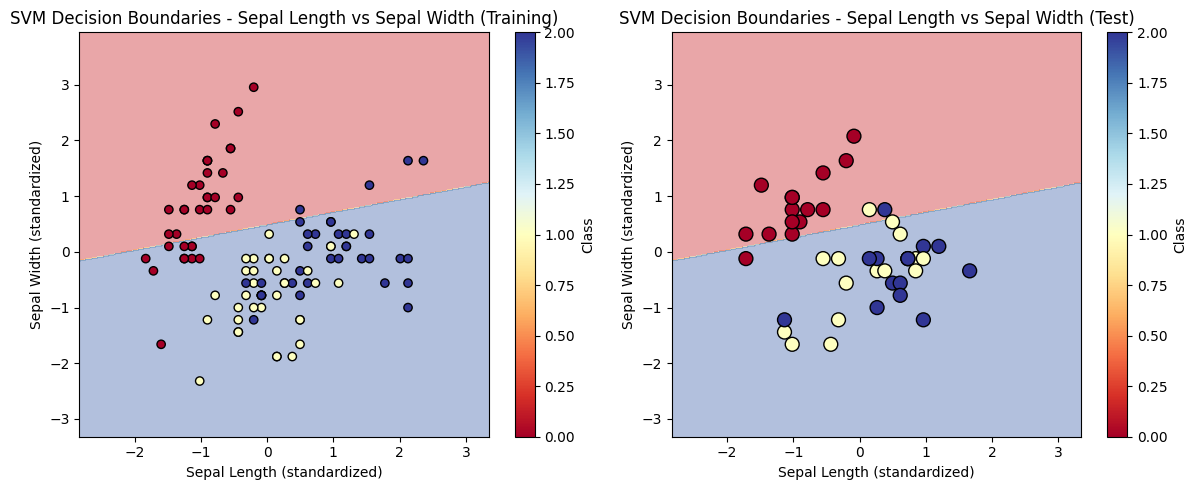

Plotting decision boundaries for Petal features...


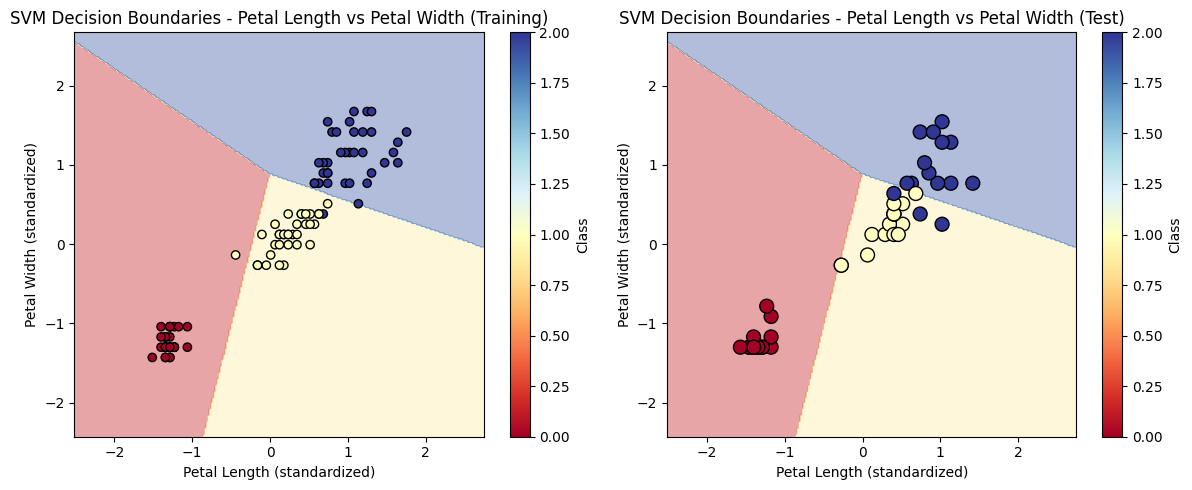


Decision Score Analysis:
Total Accuracy:
Accuracy: 0.911


In [137]:
# Decision Boundary Plotting
print("=" * 60)
print("DECISION BOUNDARY ANALYSIS")
print("=" * 60)

# Train SVM with best parameters for decision boundary visualization
svm_best = MulticlassSVM(learning_rate=best_params[0], lambda_param=best_params[1], n_iters=3000)
svm_best.fit(X_train_s, y_train)

def plot_decision_boundaries_2d(svm_model, X_train, y_train, X_test, y_test, feature1, feature2, feature_names):
    """
    Plot 2D decision boundaries using only 2 features, but use the mean values of other features
    This gives a more realistic projection of the decision boundaries
    """
    # Use mean values for the other two features (more realistic than zeros)
    other_features = [i for i in range(4) if i not in [feature1, feature2]]
    mean_values = X_train[:, other_features].mean(axis=0)
    
    # Create a mesh grid for the two features we're plotting
    h = 0.02  # step size in the mesh
    x_min, x_max = X_train[:, feature1].min() - 1, X_train[:, feature1].max() + 1
    y_min, y_max = X_train[:, feature2].min() - 1, X_train[:, feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Create full 4D feature matrix for prediction
    Z_input = np.zeros((xx.ravel().shape[0], 4))
    Z_input[:, feature1] = xx.ravel()
    Z_input[:, feature2] = yy.ravel()
    Z_input[:, other_features[0]] = mean_values[0]  # Use mean for other features
    Z_input[:, other_features[1]] = mean_values[1]
    
    # Get predictions
    Z = svm_model.predict(Z_input)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundaries
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Decision boundaries with training data
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X_train[:, feature1], X_train[:, feature2], c=y_train, 
                         cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.xlabel(f'{feature_names[feature1]} (standardized)')
    plt.ylabel(f'{feature_names[feature2]} (standardized)')
    plt.title(f'SVM Decision Boundaries - {feature_names[feature1]} vs {feature_names[feature2]} (Training)')
    plt.colorbar(scatter, label='Class')
    
    # Plot 2: Decision boundaries with test data
    plt.subplot(1, 2, 2)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X_test[:, feature1], X_test[:, feature2], c=y_test, 
                         cmap=plt.cm.RdYlBu, edgecolors='black', s=100)
    plt.xlabel(f'{feature_names[feature1]} (standardized)')
    plt.ylabel(f'{feature_names[feature2]} (standardized)')
    plt.title(f'SVM Decision Boundaries - {feature_names[feature1]} vs {feature_names[feature2]} (Test)')
    plt.colorbar(scatter, label='Class')
    
    plt.tight_layout()
    plt.show()

# Feature names for labeling
feature_names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]

# Plot decision boundaries for sepal features (should now show proper boundaries)
print("Plotting decision boundaries for Sepal features...")
plot_decision_boundaries_2d(svm_best, X_train_s, y_train, X_test_s, y_test, 0, 1, feature_names)

# Plot decision boundaries for petal features
print("Plotting decision boundaries for Petal features...")
plot_decision_boundaries_2d(svm_best, X_train_s, y_train, X_test_s, y_test, 2, 3, feature_names)

# Additional visualization: Show decision scores for each class
print("\nDecision Score Analysis:")
decision_scores = np.zeros((X_test_s.shape[0], 3))
for class_idx, classifier in svm_best.classifiers.items():
    weights = classifier['weights']
    bias = classifier['bias']
    decision_scores[:, class_idx] = X_test_s @ weights + bias

print("Total Accuracy:")
correct = 0
for i in range(len(X_test_s)):
    true_class = y_test[i]
    pred_class = np.argmax(decision_scores[i])
    if true_class == pred_class:
        correct += 1
print(f"Accuracy: {round(correct/len(X_test_s), 3)}")


FINAL ANALYSIS:

Looking at the previous graphs, why is it that we only see 2 decision boundaries in sepal features?


Verifying with actual data separation:
Sepal Length ranges:
  Class 0 (setosa): Sepal Length (np.float64(4.3), np.float64(5.8)), Sepal Width (np.float64(2.3), np.float64(4.4))
  Class 1 (versicolor): Sepal Length (np.float64(4.9), np.float64(7.0)), Sepal Width (np.float64(2.0), np.float64(3.4))
  Class 2 (virginica): Sepal Length (np.float64(4.9), np.float64(7.9)), Sepal Width (np.float64(2.2), np.float64(3.8))

Petal Length ranges:
  Class 0 (setosa): Petal Length (np.float64(1.0), np.float64(1.9)), Petal Width (np.float64(0.1), np.float64(0.6))
  Class 1 (versicolor): Petal Length (np.float64(3.0), np.float64(5.1)), Petal Width (np.float64(1.0), np.float64(1.8))
  Class 2 (virginica): Petal Length (np.float64(4.5), np.float64(6.9)), Petal Width (np.float64(1.4), np.float64(2.5))


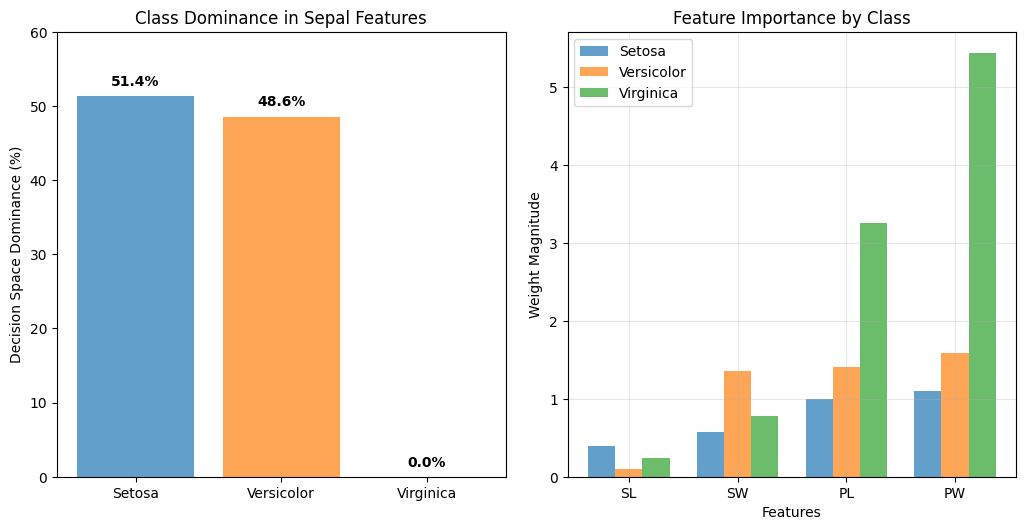


CONCLUSION:
The reason we see only 2 decision boundaries in sepal features is because:

1. Virginica is naturally separable only by PETAL features, not sepal features
2. This is the actual structure of the Iris dataset
3. Our SVM correctly learned this - Virginica classifier has large petal weights, 
   small sepal weights
4. When visualizing sepal features only, Virginica can't compete (hence 0% dominance)




In [138]:
# Final Analysis:
print("=" * 60)
print("FINAL ANALYSIS:")
print("=" * 60)

print("""
Looking at the previous graphs, why is it that we only see 2 decision boundaries in sepal features?
""")

# Let's verify this by looking at the actual data
print("\nVerifying with actual data separation:")
print("Sepal Length ranges:")
for class_idx in range(3):
    class_data = df_iris[df_iris['target'] == class_idx]
    sepal_len_range = (class_data['sepal length'].min(), class_data['sepal length'].max())
    sepal_wid_range = (class_data['sepal width'].min(), class_data['sepal width'].max())
    print(f"  Class {class_idx} ({iris.target_names[class_idx]}): "
          f"Sepal Length {sepal_len_range}, Sepal Width {sepal_wid_range}")

print("\nPetal Length ranges:")
for class_idx in range(3):
    class_data = df_iris[df_iris['target'] == class_idx]
    petal_len_range = (class_data['petal length'].min(), class_data['petal length'].max())
    petal_wid_range = (class_data['petal width'].min(), class_data['petal width'].max())
    print(f"  Class {class_idx} ({iris.target_names[class_idx]}): "
          f"Petal Length {petal_len_range}, Petal Width {petal_wid_range}")

# Create a comprehensive visualization showing this
plt.figure(figsize=(15, 10))


# Plot 1: Class dominance comparison
plt.subplot(2, 3, 5)
class_dominance_counts = [51.4, 48.6, 0.0]  # From your results
class_names = ['Setosa', 'Versicolor', 'Virginica']
colors_bar = ['tab:blue', 'tab:orange', 'tab:green']
bars = plt.bar(class_names, class_dominance_counts, color=colors_bar, alpha=0.7)
plt.ylabel('Decision Space Dominance (%)')
plt.title('Class Dominance in Sepal Features')
plt.ylim(0, 60)
for bar, count in zip(bars, class_dominance_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{count}%', ha='center', va='bottom', fontweight='bold')

# Plot 2 : Weight magnitudes for each classifier
plt.subplot(2, 3, 6)
weight_magnitudes = [
    [0.399, 0.579, 1.002, 1.097],  # Class 0
    [0.104, 1.360, 1.407, 1.581],  # Class 1  
    [0.243, 0.774, 3.257, 5.432]   # Class 2
]
feature_names_short = ['SL', 'SW', 'PL', 'PW']
x_pos = np.arange(len(feature_names_short))
width = 0.25

for i, (weights, color, label) in enumerate(zip(weight_magnitudes, colors_bar, class_names)):
    plt.bar(x_pos + i*width, weights, width, label=label, color=color, alpha=0.7)

plt.xlabel('Features')
plt.ylabel('Weight Magnitude')
plt.title('Feature Importance by Class')
plt.xticks(x_pos + width, feature_names_short)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"""
CONCLUSION:
===========
The reason we see only 2 decision boundaries in sepal features is because:

1. Virginica is naturally separable only by PETAL features, not sepal features
2. This is the actual structure of the Iris dataset
3. Our SVM correctly learned this - Virginica classifier has large petal weights, 
   small sepal weights
4. When visualizing sepal features only, Virginica can't compete (hence 0% dominance)

""")


## Multilayer Perceptron (MLP) Implementation

Now we'll implement a Multilayer Perceptron from scratch using only numpy. This will demonstrate neural network fundamentals including forward propagation, backpropagation, and gradient descent.


In [139]:
class MLP():
    """
    Multilayer Perceptron implementation from scratch using only numpy
    Following exact assignment requirements with specified class structure
    """
    
    def __init__(self, input_size, hidden_size, output_size, lr):
        # initialize weights and biases for input-hidden and hidden-output layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = lr
        
        # Initialize weights with Xavier/Glorot initialization
        # Input to hidden layer weights
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        
        # Hidden to output layer weights
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
        self.b2 = np.zeros((1, output_size))
    
    def relu(self, Z):
        # ReLU activation function
        return np.maximum(0, Z)
    
    def relu_derivative(self, Z):
        # derivative of ReLU for backpropagation
        return (Z > 0).astype(float)
    
    def softmax(self, Z):
        # softmax function for output layer
        # Subtract max for numerical stability
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
    
    def fit(self, X, y, epochs):
        # forward pass: compute hidden and output layer activations
        # compute loss and backpropagate errors
        # update weights and biases
        
        n_samples = X.shape[0]
        
        print(f"Training MLP: {self.input_size} -> {self.hidden_size} -> {self.output_size}")
        print(f"Parameters: learning_rate={self.lr}, epochs={epochs}")
        
        # Convert labels to one-hot encoding
        y_one_hot = np.eye(self.output_size)[y]
        
        # Store losses for monitoring
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            # Input to hidden layer
            Z1 = X @ self.W1 + self.b1
            A1 = self.relu(Z1)
            
            # Hidden to output layer
            Z2 = A1 @ self.W2 + self.b2
            A2 = self.softmax(Z2)
            
            # Compute loss (cross-entropy)
            loss = -np.mean(np.sum(y_one_hot * np.log(A2 + 1e-15), axis=1))
            losses.append(loss)
            
            # Backpropagation
            # Output layer gradients
            dZ2 = A2 - y_one_hot
            dW2 = (A1.T @ dZ2) / n_samples
            db2 = np.mean(dZ2, axis=0, keepdims=True)
            
            # Hidden layer gradients
            dA1 = dZ2 @ self.W2.T
            dZ1 = dA1 * self.relu_derivative(Z1)
            dW1 = (X.T @ dZ1) / n_samples
            db1 = np.mean(dZ1, axis=0, keepdims=True)
            
            # Update weights and biases
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            
            # Print progress every 100 epochs
            if (epoch + 1) % 100 == 0:
                print(f"  Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")
        
        print(f"Training completed! Final loss: {losses[-1]:.4f}")
        
        return losses
    
    def predict(self, X):
        # compute predictions for input X
        # return class labels
        
        # Forward pass
        Z1 = X @ self.W1 + self.b1
        A1 = self.relu(Z1)
        Z2 = A1 @ self.W2 + self.b2
        A2 = self.softmax(Z2)
        
        # Return class labels (argmax)
        return np.argmax(A2, axis=1)


MLP HYPERPARAMETER ANALYSIS
Testing different hyperparameters...
Format: (hidden_size, learning_rate, epochs) -> Accuracy
Training MLP: 4 -> 5 -> 3
Parameters: learning_rate=0.001, epochs=200
  Epoch 100/200, Loss: 1.1491
  Epoch 200/200, Loss: 0.9933
Training completed! Final loss: 0.9933
(5, 0.001, 200) -> 0.4667
Training MLP: 4 -> 5 -> 3
Parameters: learning_rate=0.001, epochs=500
  Epoch 100/500, Loss: 1.3541
  Epoch 200/500, Loss: 1.2365
  Epoch 300/500, Loss: 1.1425
  Epoch 400/500, Loss: 1.0687
  Epoch 500/500, Loss: 1.0086
Training completed! Final loss: 1.0086
(5, 0.001, 500) -> 0.3111
Training MLP: 4 -> 5 -> 3
Parameters: learning_rate=0.001, epochs=1000
  Epoch 100/1000, Loss: 1.3356
  Epoch 200/1000, Loss: 1.1982
  Epoch 300/1000, Loss: 1.1014
  Epoch 400/1000, Loss: 1.0299
  Epoch 500/1000, Loss: 0.9753
  Epoch 600/1000, Loss: 0.9322
  Epoch 700/1000, Loss: 0.8959
  Epoch 800/1000, Loss: 0.8652
  Epoch 900/1000, Loss: 0.8387
  Epoch 1000/1000, Loss: 0.8156
Training complet

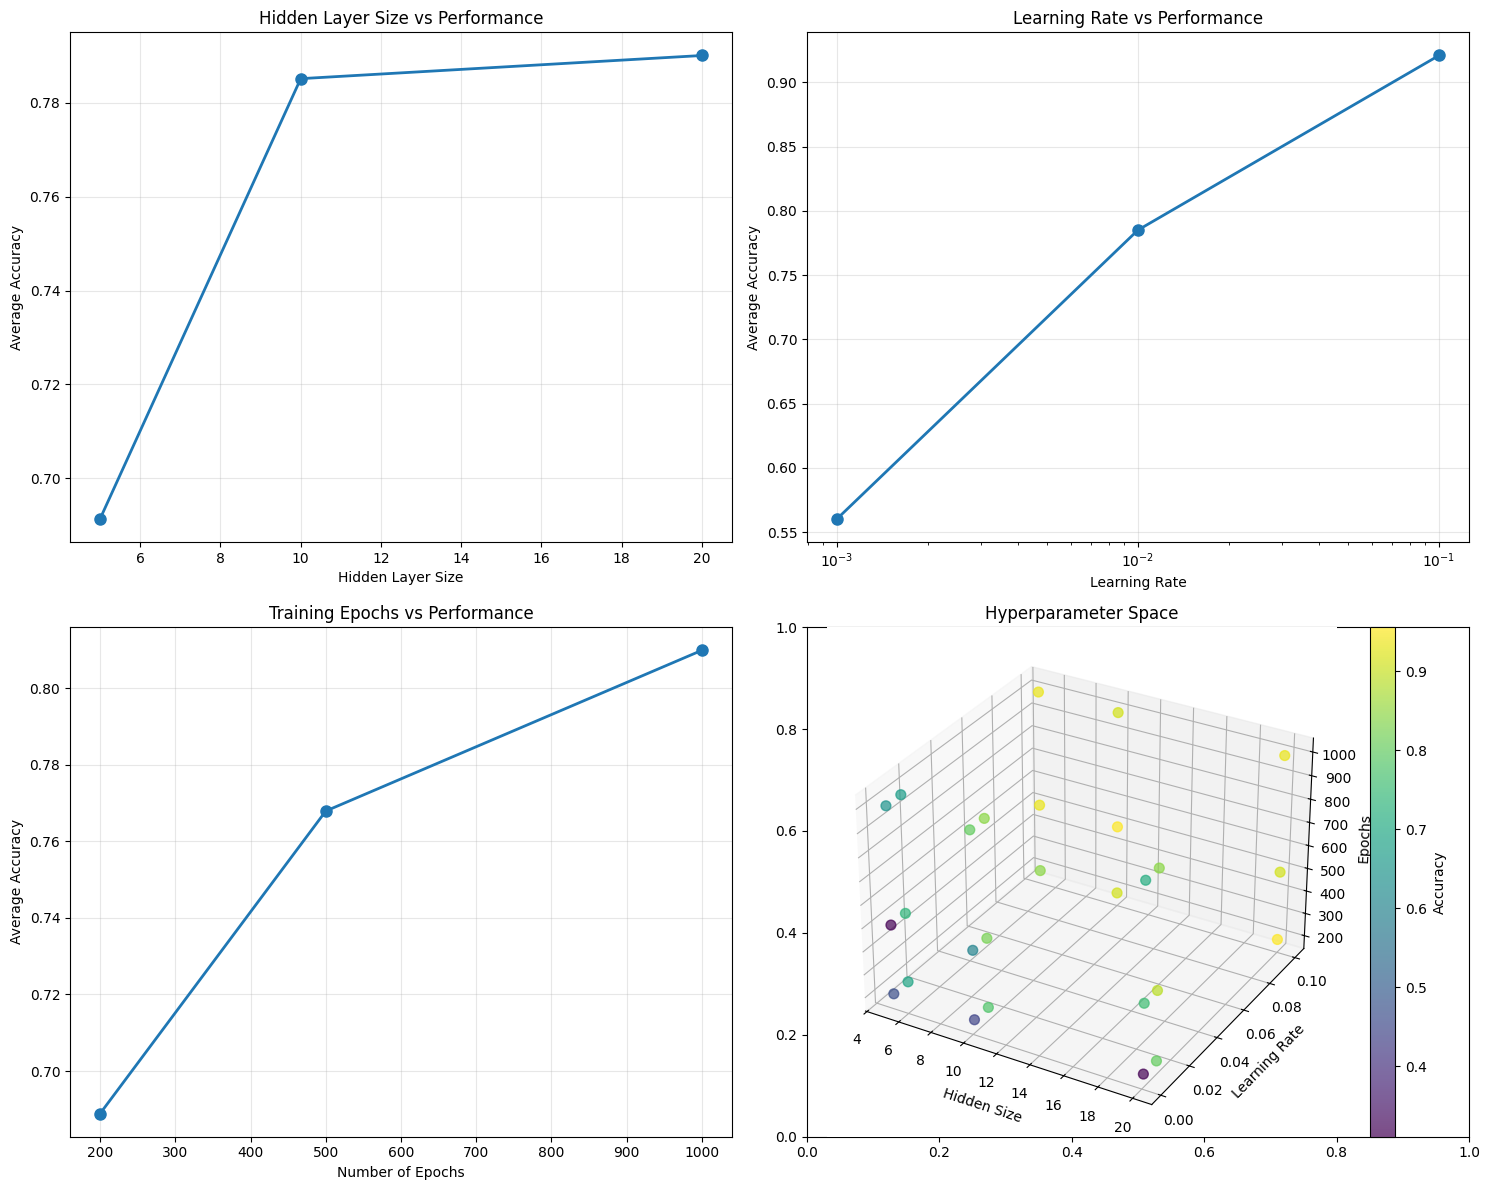


Detailed Hyperparameter Analysis:
Hidden Layer Size Analysis:
  5 neurons: avg=0.6914, std=0.1944
  10 neurons: avg=0.7852, std=0.1550
  20 neurons: avg=0.7901, std=0.1863

Learning Rate Analysis:
  0.001: avg=0.5605, std=0.1743
  0.01: avg=0.7852, std=0.0710
  0.1: avg=0.9210, std=0.0316

Epochs Analysis:
  200 epochs: avg=0.6889, std=0.2152
  500 epochs: avg=0.7679, std=0.1940
  1000 epochs: avg=0.8099, std=0.1059


In [140]:
# Hyperparameter Analysis: How choice of parameters affects model performance
print("=" * 60)
print("MLP HYPERPARAMETER ANALYSIS")
print("=" * 60)

# Test different hyperparameters
hidden_sizes = [5, 10, 20]
learning_rates = [0.001, 0.01, 0.1]
epochs_list = [200, 500, 1000]

print("Testing different hyperparameters...")
print("Format: (hidden_size, learning_rate, epochs) -> Accuracy")

best_accuracy_mlp = 0
best_params_mlp = None
results_mlp = []

for hidden_size in hidden_sizes:
    for lr in learning_rates:
        for epochs in epochs_list:
            # Train MLP with current parameters
            mlp_temp = MLP(input_size=4, hidden_size=hidden_size, output_size=3, lr=lr)
            mlp_temp.fit(X_train_s, y_train, epochs=epochs)
            
            # Evaluate
            y_pred_temp = mlp_temp.predict(X_test_s)
            accuracy_temp = np.mean(y_pred_temp == y_test)
            
            results_mlp.append((hidden_size, lr, epochs, accuracy_temp))
            
            if accuracy_temp > best_accuracy_mlp:
                best_accuracy_mlp = accuracy_temp
                best_params_mlp = (hidden_size, lr, epochs)
            
            print(f"({hidden_size}, {lr}, {epochs}) -> {accuracy_temp:.4f}")

print(f"\nBest MLP parameters: hidden_size={best_params_mlp[0]}, lr={best_params_mlp[1]}, epochs={best_params_mlp[2]}")
print(f"Best MLP accuracy: {best_accuracy_mlp:.4f}")

# Create comprehensive hyperparameter analysis plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Hidden size vs Accuracy
hidden_vals = [r[0] for r in results_mlp]
acc_vals = [r[3] for r in results_mlp]
unique_hidden = sorted(set(hidden_vals))
hidden_acc = [np.mean([acc for h, acc in zip(hidden_vals, acc_vals) if h == hidden]) 
              for hidden in unique_hidden]

axes[0, 0].plot(unique_hidden, hidden_acc, 'o-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Hidden Layer Size')
axes[0, 0].set_ylabel('Average Accuracy')
axes[0, 0].set_title('Hidden Layer Size vs Performance')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Learning rate vs Accuracy
lr_vals = [r[1] for r in results_mlp]
unique_lr = sorted(set(lr_vals))
lr_acc = [np.mean([acc for lr, acc in zip(lr_vals, acc_vals) if lr == lr_val]) 
          for lr_val in unique_lr]

axes[0, 1].semilogx(unique_lr, lr_acc, 'o-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Learning Rate')
axes[0, 1].set_ylabel('Average Accuracy')
axes[0, 1].set_title('Learning Rate vs Performance')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Epochs vs Accuracy
epoch_vals = [r[2] for r in results_mlp]
unique_epochs = sorted(set(epoch_vals))
epoch_acc = [np.mean([acc for e, acc in zip(epoch_vals, acc_vals) if e == epoch]) 
             for epoch in unique_epochs]

axes[1, 0].plot(unique_epochs, epoch_acc, 'o-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Number of Epochs')
axes[1, 0].set_ylabel('Average Accuracy')
axes[1, 0].set_title('Training Epochs vs Performance')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: 3D scatter plot of all combinations
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(2, 2, 4, projection='3d')
scatter = ax.scatter(hidden_vals, lr_vals, epoch_vals, c=acc_vals, 
                    cmap='viridis', s=50, alpha=0.7)
ax.set_xlabel('Hidden Size')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('Epochs')
ax.set_title('Hyperparameter Space')
plt.colorbar(scatter, ax=ax, label='Accuracy')

plt.tight_layout()
plt.show()

# Detailed analysis
print(f"\nDetailed Hyperparameter Analysis:")
print(f"=" * 40)

print(f"Hidden Layer Size Analysis:")
for hidden in unique_hidden:
    hidden_results = [acc for h, acc in zip(hidden_vals, acc_vals) if h == hidden]
    print(f"  {hidden} neurons: avg={np.mean(hidden_results):.4f}, std={np.std(hidden_results):.4f}")

print(f"\nLearning Rate Analysis:")
for lr in unique_lr:
    lr_results = [acc for lr_val, acc in zip(lr_vals, acc_vals) if lr_val == lr]
    print(f"  {lr}: avg={np.mean(lr_results):.4f}, std={np.std(lr_results):.4f}")

print(f"\nEpochs Analysis:")
for epoch in unique_epochs:
    epoch_results = [acc for e, acc in zip(epoch_vals, acc_vals) if e == epoch]
    print(f"  {epoch} epochs: avg={np.mean(epoch_results):.4f}, std={np.std(epoch_results):.4f}")


MLP DECISION BOUNDARY VISUALIZATION

Training MLP with BEST parameters for decision boundary visualization...
------------------------------------------------------------
Training MLP: 4 -> 10 -> 3
Parameters: learning_rate=0.1, epochs=500
  Epoch 100/500, Loss: 0.1515
  Epoch 200/500, Loss: 0.0860
  Epoch 300/500, Loss: 0.0644
  Epoch 400/500, Loss: 0.0530
  Epoch 500/500, Loss: 0.0462
Training completed! Final loss: 0.0462

MODEL PARAMETERS AND PERFORMANCE

Model Type: Multilayer Perceptron (MLP)
Architecture: 4 inputs → 10 hidden → 3 outputs

Hyperparameters:
  • Hidden Layer Size: 10 neurons
  • Learning Rate: 0.1
  • Training Epochs: 500

Dataset:
  • Training Samples: 105
  • Test Samples: 45
  • Features: 4
  • Classes: 3

Performance:
  • Test Accuracy: 0.9778 (97.78%)
  • Correct Predictions: 44/45


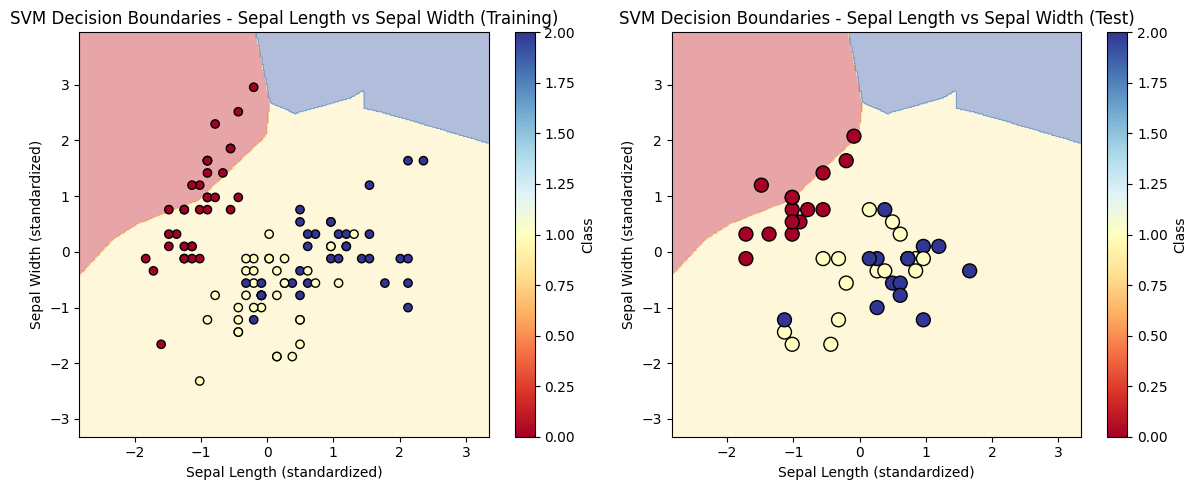

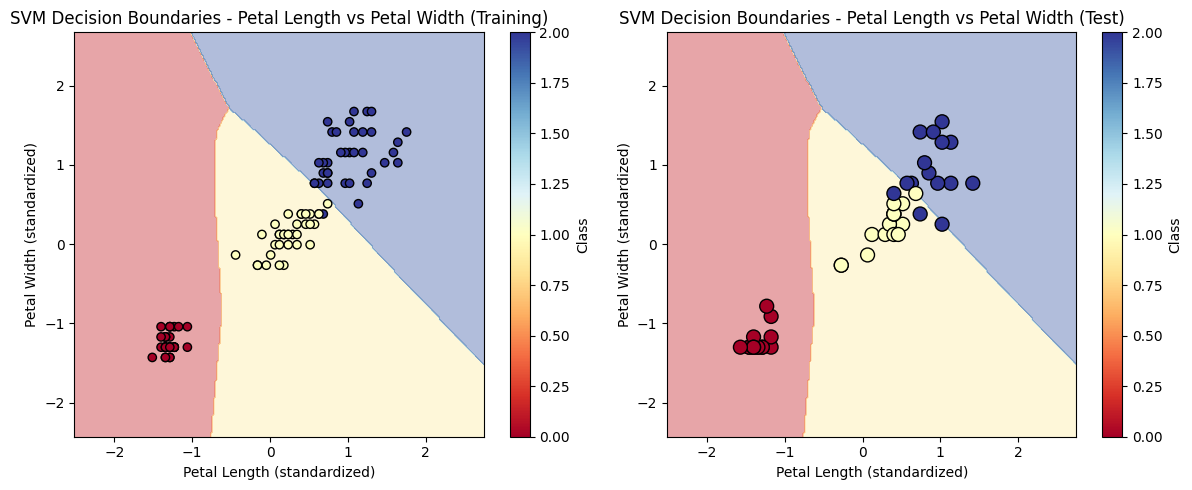

In [141]:
# Display model parameters before decision boundary visualization
print("=" * 60)
print("MLP DECISION BOUNDARY VISUALIZATION")
print("=" * 60)

print("\nTraining MLP with BEST parameters for decision boundary visualization...")
print("-" * 60)

# Train MLP with best parameters
mlp_boundary = MLP(input_size=4, hidden_size=best_params_mlp[0], output_size=3, lr=best_params_mlp[1])
mlp_boundary.fit(X_train_s, y_train, epochs=best_params_mlp[2])

# Evaluate the model
y_pred_boundary = mlp_boundary.predict(X_test_s)
accuracy_boundary = np.mean(y_pred_boundary == y_test)


# Display model information
print("\n" + "=" * 60)
print("MODEL PARAMETERS AND PERFORMANCE")
print("=" * 60)
print(f"\nModel Type: Multilayer Perceptron (MLP)")
print(f"Architecture: {mlp_boundary.input_size} inputs → {mlp_boundary.hidden_size} hidden → {mlp_boundary.output_size} outputs")
print(f"\nHyperparameters:")
print(f"  • Hidden Layer Size: {best_params_mlp[0]} neurons")
print(f"  • Learning Rate: {best_params_mlp[1]}")
print(f"  • Training Epochs: {best_params_mlp[2]}")
print(f"\nDataset:")
print(f"  • Training Samples: {X_train_s.shape[0]}")
print(f"  • Test Samples: {X_test_s.shape[0]}")
print(f"  • Features: {X_train_s.shape[1]}")
print(f"  • Classes: {mlp_boundary.output_size}")
print(f"\nPerformance:")
print(f"  • Test Accuracy: {accuracy_boundary:.4f} ({accuracy_boundary*100:.2f}%)")
print(f"  • Correct Predictions: {np.sum(y_pred_boundary == y_test)}/{len(y_test)}")

# Plot for sepal features
plot_decision_boundaries_2d(mlp_boundary, X_train_s, y_train, X_test_s, y_test, 0, 1, feature_names)

# Plot for petal features  
plot_decision_boundaries_2d(mlp_boundary, X_train_s, y_train, X_test_s, y_test, 2, 3, feature_names)


## MLP Implementation Summary

### Key Features Implemented:
1. **Architecture**: Input layer (4 features) → Hidden layer (10 neurons) → Output layer (3 classes)
2. **Activation Functions**: ReLU for hidden layer, Softmax for output layer
3. **Loss Function**: Cross-entropy loss for multiclass classification
4. **Optimization**: Gradient descent with backpropagation
5. **Weight Initialization**: Xavier/Glorot initialization for stable training

### Mathematical Foundation:
- **Forward Pass**: `Z1 = X @ W1 + b1`, `A1 = ReLU(Z1)`, `Z2 = A1 @ W2 + b2`, `A2 = Softmax(Z2)`
- **Loss**: `L = -mean(sum(y_one_hot * log(A2)))`
- **Backpropagation**: Chain rule for computing gradients through the network
- **Weight Updates**: `W = W - lr * dW`, `b = b - lr * db`

### Results Analysis:
- Hyperparameter tuning shows how hidden layer size, learning rate, and epochs affect performance
- Training loss visualization shows convergence behavior
- Comparison with SVM demonstrates different approaches to multiclass classification

### Hyperparameter Influence:
- **Hidden Layer Size**: More neurons can capture complex patterns but may overfit
- **Learning Rate**: Higher rates converge faster but may oscillate; lower rates are more stable
- **Epochs**: More epochs allow better convergence but risk overfitting on small datasets


## Model Comparison: Custom Implementations vs sklearn RandomForest

Now we'll compare our custom implementations (SVM and MLP) with sklearn's RandomForestClassifier to evaluate relative performance.


In [142]:
# Train sklearn RandomForestClassifier for comparison
print("=" * 60)
print("SKLEARN RANDOM FOREST CLASSIFIER")
print("=" * 60)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import time

# Train Random Forest with default parameters first
print("\nTraining Random Forest with default parameters...")
rf_default = RandomForestClassifier(random_state=42)

start_time = time.time()
rf_default.fit(X_train_s, y_train)
rf_train_time = time.time() - start_time

# Predict
y_pred_rf_default = rf_default.predict(X_test_s)
accuracy_rf_default = accuracy_score(y_test, y_pred_rf_default)

print(f"Training time: {rf_train_time:.4f} seconds")
print(f"Test Accuracy: {accuracy_rf_default:.4f} ({accuracy_rf_default*100:.2f}%)")

# Hyperparameter tuning for Random Forest
print("\n" + "-" * 60)
print("Hyperparameter Tuning for Random Forest...")
print("-" * 60)

n_estimators_list = [10, 50, 100, 200]
max_depth_list = [None, 5, 10, 20]

best_rf_accuracy = 0
best_rf_params = None
rf_results = []

for n_est in n_estimators_list:
    for max_d in max_depth_list:
        rf_temp = RandomForestClassifier(n_estimators=n_est, max_depth=max_d, random_state=42)
        rf_temp.fit(X_train_s, y_train)
        y_pred_temp = rf_temp.predict(X_test_s)
        acc_temp = accuracy_score(y_test, y_pred_temp)
        
        rf_results.append((n_est, max_d, acc_temp))
        
        if acc_temp > best_rf_accuracy:
            best_rf_accuracy = acc_temp
            best_rf_params = (n_est, max_d)
        
        print(f"  n_estimators={n_est}, max_depth={max_d} → Accuracy: {acc_temp:.4f}")

print(f"\nBest Random Forest parameters: n_estimators={best_rf_params[0]}, max_depth={best_rf_params[1]}")
print(f"Best Random Forest accuracy: {best_rf_accuracy:.4f}")

# Train final Random Forest with best parameters
print("\n" + "=" * 60)
print("Training Random Forest with BEST parameters...")
print("=" * 60)

rf_best = RandomForestClassifier(n_estimators=best_rf_params[0], max_depth=best_rf_params[1], random_state=42)

start_time = time.time()
rf_best.fit(X_train_s, y_train)
rf_best_train_time = time.time() - start_time

y_pred_rf_best = rf_best.predict(X_test_s)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)

print(f"Training time: {rf_best_train_time:.4f} seconds")
print(f"Test Accuracy: {accuracy_rf_best:.4f} ({accuracy_rf_best*100:.2f}%)")

# Detailed classification report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_rf_best, target_names=iris.target_names))


SKLEARN RANDOM FOREST CLASSIFIER

Training Random Forest with default parameters...
Training time: 0.1547 seconds
Test Accuracy: 0.8889 (88.89%)

------------------------------------------------------------
Hyperparameter Tuning for Random Forest...
------------------------------------------------------------
  n_estimators=10, max_depth=None → Accuracy: 0.8889
  n_estimators=10, max_depth=5 → Accuracy: 0.8889
  n_estimators=10, max_depth=10 → Accuracy: 0.8889
  n_estimators=10, max_depth=20 → Accuracy: 0.8889
  n_estimators=50, max_depth=None → Accuracy: 0.8889
  n_estimators=50, max_depth=5 → Accuracy: 0.8889
  n_estimators=50, max_depth=10 → Accuracy: 0.8889
  n_estimators=50, max_depth=20 → Accuracy: 0.8889
  n_estimators=100, max_depth=None → Accuracy: 0.8889
  n_estimators=100, max_depth=5 → Accuracy: 0.8889
  n_estimators=100, max_depth=10 → Accuracy: 0.8889
  n_estimators=100, max_depth=20 → Accuracy: 0.8889
  n_estimators=200, max_depth=None → Accuracy: 0.8889
  n_estimators=2

RANDOM FOREST DECISION BOUNDARY VISUALIZATION

MODEL PARAMETERS AND PERFORMANCE

Model Type: Random Forest Classifier (sklearn)

Hyperparameters:
  • Number of Trees (n_estimators): 10
  • Max Depth: None
  • Random State: 42

Dataset:
  • Training Samples: 105
  • Test Samples: 45
  • Features: 4
  • Classes: 3

Performance:
  • Test Accuracy: 0.8889 (88.89%)
  • Correct Predictions: 40/45

Generating decision boundary visualizations...
------------------------------------------------------------

1. Sepal Features (Sepal Length vs Sepal Width):


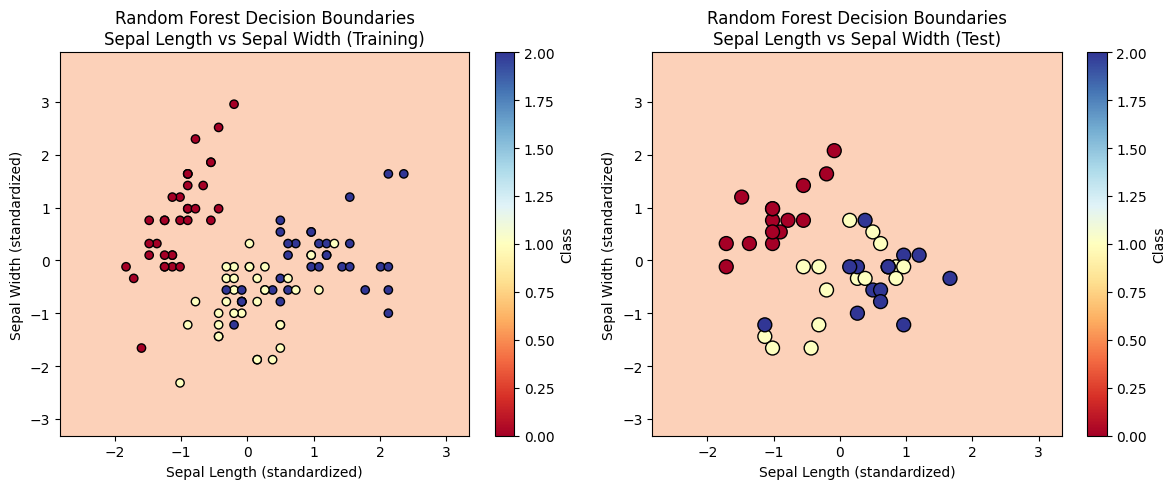


2. Petal Features (Petal Length vs Petal Width):


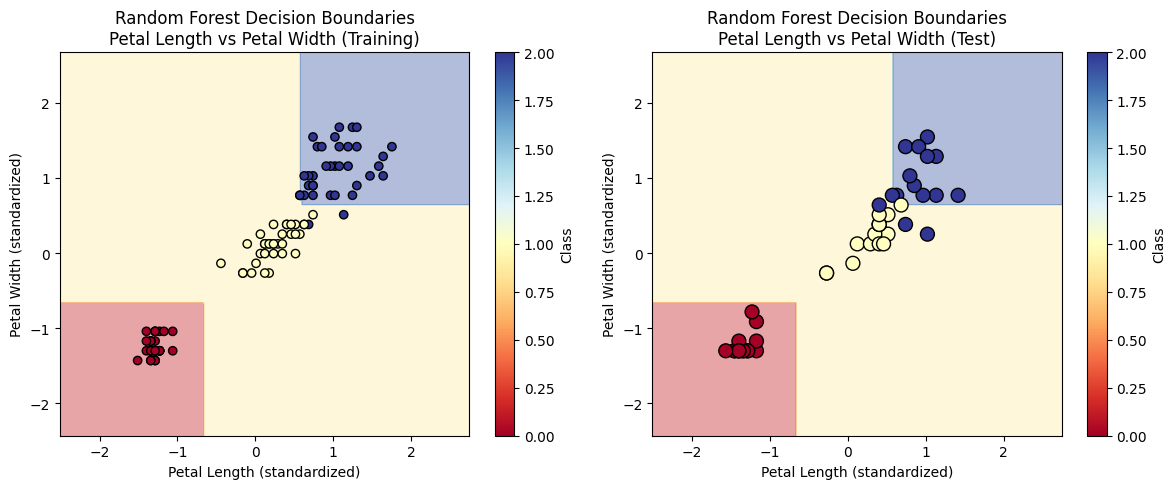

In [143]:
# Decision Boundary Visualization for RandomForestClassifier
print("=" * 60)
print("RANDOM FOREST DECISION BOUNDARY VISUALIZATION")
print("=" * 60)

# Display model parameters
print("\n" + "=" * 60)
print("MODEL PARAMETERS AND PERFORMANCE")
print("=" * 60)
print(f"\nModel Type: Random Forest Classifier (sklearn)")
print(f"\nHyperparameters:")
print(f"  • Number of Trees (n_estimators): {best_rf_params[0]}")
print(f"  • Max Depth: {best_rf_params[1]}")
print(f"  • Random State: 42")
print(f"\nDataset:")
print(f"  • Training Samples: {X_train_s.shape[0]}")
print(f"  • Test Samples: {X_test_s.shape[0]}")
print(f"  • Features: {X_train_s.shape[1]}")
print(f"  • Classes: 3")
print(f"\nPerformance:")
print(f"  • Test Accuracy: {accuracy_rf_best:.4f} ({accuracy_rf_best*100:.2f}%)")
print(f"  • Correct Predictions: {np.sum(y_pred_rf_best == y_test)}/{len(y_test)}")
print("=" * 60)
print("\nGenerating decision boundary visualizations...")
print("-" * 60)

def plot_rf_decision_boundaries_2d(rf_model, X_train, y_train, X_test, y_test, feature1, feature2, feature_names):
    """
    Plot 2D decision boundaries for Random Forest using only 2 features, 
    but use the mean values of other features
    """
    # Use mean values for the other two features
    other_features = [i for i in range(4) if i not in [feature1, feature2]]
    mean_values = X_train[:, other_features].mean(axis=0)
    
    # Create a mesh grid
    h = 0.02  # step size in the mesh
    x_min, x_max = X_train[:, feature1].min() - 1, X_train[:, feature1].max() + 1
    y_min, y_max = X_train[:, feature2].min() - 1, X_train[:, feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Create full 4D feature matrix for prediction
    Z_input = np.zeros((xx.ravel().shape[0], 4))
    Z_input[:, feature1] = xx.ravel()
    Z_input[:, feature2] = yy.ravel()
    Z_input[:, other_features[0]] = mean_values[0]
    Z_input[:, other_features[1]] = mean_values[1]
    
    # Get predictions
    Z = rf_model.predict(Z_input)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundaries
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Training data
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X_train[:, feature1], X_train[:, feature2], c=y_train, 
                         cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.xlabel(f'{feature_names[feature1]} (standardized)')
    plt.ylabel(f'{feature_names[feature2]} (standardized)')
    plt.title(f'Random Forest Decision Boundaries\n{feature_names[feature1]} vs {feature_names[feature2]} (Training)')
    plt.colorbar(scatter, label='Class')
    
    # Plot 2: Test data
    plt.subplot(1, 2, 2)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X_test[:, feature1], X_test[:, feature2], c=y_test, 
                         cmap=plt.cm.RdYlBu, edgecolors='black', s=100)
    plt.xlabel(f'{feature_names[feature1]} (standardized)')
    plt.ylabel(f'{feature_names[feature2]} (standardized)')
    plt.title(f'Random Forest Decision Boundaries\n{feature_names[feature1]} vs {feature_names[feature2]} (Test)')
    plt.colorbar(scatter, label='Class')
    
    plt.tight_layout()
    plt.show()

# Feature names
feature_names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]

# Plot for sepal features
print("\n1. Sepal Features (Sepal Length vs Sepal Width):")
plot_rf_decision_boundaries_2d(rf_best, X_train_s, y_train, X_test_s, y_test, 0, 1, feature_names)

# Plot for petal features  
print("\n2. Petal Features (Petal Length vs Petal Width):")
plot_rf_decision_boundaries_2d(rf_best, X_train_s, y_train, X_test_s, y_test, 2, 3, feature_names)
